In this presentation is described the full procedure which is reffered to the building of a model that is able to recognize a human activity. Specifically, the human activities examined are "walking", "cycling" and "running".   

# Get/Prepare phase

The fist task was to collect the samples. In total, 10 samples were collected for each of the three activities for each of 6 individuals. Thus, we have 180 samples.
Each sample consists of 30 seconds data from X,Y,Z axes of smartphone accelerometers.
The frequency of recorded data is 50Hz.
All samples were collected with the same smartphone (Pocophone F1) with the aim of Accelerometer analyzer app from Mobile Tools.

The next task was to annotate the samples which was happened after each sample was collected.

Let get a sample of cycling and a sample of walking and vizualize them in order to know how the signal is look like:

In [2]:
import requests
import base64
import json
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#function to get samples from github
def get_sample_from_github(url):
    
    #Username and token is necessary in order to make 5000 request per hour to github
    username = 'george22294'
    token = '47450b89cf3ebd19cd94da1762ce58a3aafe7c0e'
    
    #Make the request
    req = requests.get(url, auth=(username,token))
    
    #Check if github answer ok to the request
    if req.status_code == requests.codes.ok:
        
        #Convert the data to be readable
        req = req.json()
        content = base64.b64decode(req['content'])
        jsonString = content.decode('utf-8')
    
        return jsonString
    
    else:
            print("Cannot get " + url)

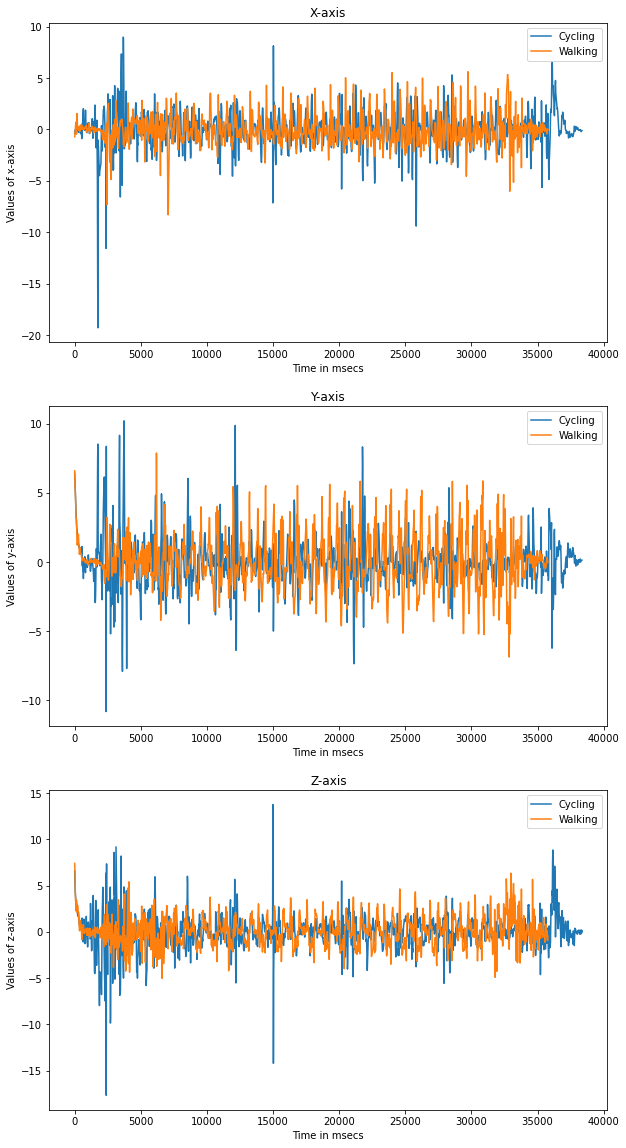

In [36]:
#Get a sample of cycling
url = "https://api.github.com/repos/george22294/Human_activities_recognition/contents/samples/Subject1/subject1_cycling/subject1_cycling1.txt"    
jsonString = get_sample_from_github(url)

#Split the file into lines
lines = jsonString.split("\r\n")

#The first 25 lines are useless
lines = lines[25:]

#Initialize the arrays in which will be stored the samples
sample_cycl_x = np.zeros((len(lines)-3, 2))
sample_cycl_y = np.zeros((len(lines)-3, 2))
sample_cycl_z = np.zeros((len(lines)-3, 2))
time = 0 

#Read the next lines except the 3 last which are useless
for i in range(len(lines)-3):
    line = lines[i].split(";")
    if len(line) < 3:
        line = lines[i].split(" ")
        
    #The third number of each line is referred to time in millisecond which has passed from the previous sample
    time += float(line[3])
    
    #Every axis-array store the time in the second dimension  
    
    #The first number of each line is referred to X-axis
    sample_cycl_x[i, 0] = float(line[0])
    sample_cycl_x[i, 1] = time
   
    #The second number of each line is referred to Y-axis
    sample_cycl_y[i, 0] = float(line[1])
    sample_cycl_y[i, 1] = time
    
    #The second number of each line is referred to Z-axis
    sample_cycl_z[i, 0] = float(line[2])
    sample_cycl_z[i, 1] = time

    
#Get a sample of walking and do the same as above   
url = "https://api.github.com/repos/george22294/Human_activities_recognition/contents/samples/Subject1/subject1_walking/subject1_walking1.txt"
jsonString = get_sample_from_github(url)
lines = jsonString.split("\r\n")
lines = lines[25:]

sample_walk_x = np.zeros((len(lines)-3, 2))
sample_walk_y = np.zeros((len(lines)-3, 2))
sample_walk_z = np.zeros((len(lines)-3, 2))
time = 0
for i in range(len(lines)-3):
    line = lines[i].split(";")
    if len(line) < 3:
        line = lines[i].split(" ")
    time += float(line[3])
    sample_walk_x[i, 0] = float(line[0])
    sample_walk_x[i, 1] = time
    sample_walk_y[i, 0] = float(line[1])
    sample_walk_y[i, 1] = time
    sample_walk_z[i, 0] = float(line[2])
    sample_walk_z[i, 1] = time

#Plot the samples
fig, (plot_x, plot_y, plot_z) = plt.subplots(3, figsize=(10, 20))

#Axis X
plot_x.set(xlabel = "Time in msecs", ylabel = "Values of x-axis")
plot_x.set_title("X-axis")
plot_x.plot(sample_cycl_x[:,1], sample_cycl_x[:,0], label="Cycling") #Cycling sample
plot_x.plot(sample_walk_x[:,1], sample_walk_x[:,0], label="Walking") #Walking sample
plot_x.legend()

#Axis Y
plot_y.set(xlabel = "Time in msecs", ylabel = "Values of y-axis")
plot_y.set_title("Y-axis")
plot_y.plot(sample_cycl_y[:,1], sample_cycl_y[:,0], label="Cycling") #Cycling sample
plot_y.plot(sample_walk_y[:,1], sample_walk_y[:,0], label="Walking") #Walking sample
plot_y.legend()

#Axis Z
plot_z.set(xlabel = "Time in msecs", ylabel = "Values of z-axis")
plot_z.set_title("Z-axis")
plot_z.plot(sample_cycl_z[:,1], sample_cycl_z[:,0], label="Cycling") #Cycling sample
plot_z.plot(sample_walk_z[:,1], sample_walk_z[:,0], label="Walking") #Walking sample
plot_z.legend()

From the above plots we have indications that the activities could be distinguished by the signal frequency, the peak values, mean, standard deviation and other possible features which are examined below. 

Now, let get all samples from github:

In [4]:
cycling = {}
running = {}
walking = {}

#Get all samples which are: 6 person X 10 samples X 3 activities = 180 samples
for i in range (6):
    for j in range(10):
        i_1=i+1
        j_1=j+1
        index = (i*10)+j
        
        #Get cycling samples from github
        url = "https://api.github.com/repos/george22294/Human_activities_recognition/contents/samples/Subject" + str(i_1) + "/subject" + str(i_1) + "_cycling/subject" + str(i_1) + "_cycling" + str(j_1) + ".txt"
        jsonString = get_sample_from_github(url)
        lines = jsonString.split("\r\n")
        lines = lines[25:]    
        sample_cycl_x = np.zeros((len(lines)-3, 1))
        sample_cycl_y = np.zeros((len(lines)-3, 1))
        sample_cycl_z = np.zeros((len(lines)-3, 1))
        time = 0 
        time_t = np.zeros((len(lines)-3, 1))
        for h in range(len(lines)-3):
            line = lines[h].split(";")
            if len(line) < 3:
                line = lines[h].split(" ")
            time += float(line[3])
            sample_cycl_x[h] = float(line[0])
            sample_cycl_y[h] = float(line[1])
            sample_cycl_z[h] = float(line[2])
            time_t[h] = time
        
        #Store every cycling sample in a dictionary with x, y, z, time key values
        cycling[str(index)] = {"x": sample_cycl_x, "y": sample_cycl_y, "z": sample_cycl_z, "time": time_t}  
              
        
        #Get running samples from github
        url = "https://api.github.com/repos/george22294/Human_activities_recognition/contents/samples/Subject" + str(i_1) + "/subject" + str(i_1) + "_running/subject" + str(i_1) + "_running" + str(j_1) + ".txt"
        jsonString = get_sample_from_github(url)
        lines = jsonString.split("\r\n")
        lines = lines[25:] 
        sample_run_x = np.zeros((len(lines)-3, 1))
        sample_run_y = np.zeros((len(lines)-3, 1))
        sample_run_z = np.zeros((len(lines)-3, 1))
        time = 0 
        time_t = np.zeros((len(lines)-3, 1))
        
        for h in range(len(lines)-3):
            line = lines[h].split(";")
            if len(line) < 3:
                line = lines[h].split(" ")
            time += float(line[3])
            sample_run_x[h] = float(line[0])
            sample_run_y[h] = float(line[1])
            sample_run_z[h] = float(line[2])
            time_t[h] = time
        
        #Store every running sample in a dictionary with x, y, z, time key values
        running[str(index)] = {"x": sample_run_x, "y": sample_run_y, "z": sample_run_z, "time": time_t}
        
        
        
         #Get walking samples from github
        url = "https://api.github.com/repos/george22294/Human_activities_recognition/contents/samples/Subject" + str(i_1) + "/subject" + str(i_1) + "_walking/subject" + str(i_1) + "_walking" + str(j_1) + ".txt"
        jsonString = get_sample_from_github(url)
        lines = jsonString.split("\r\n")
        lines = lines[25:] 
        sample_walk_x = np.zeros((len(lines)-3, 1))
        sample_walk_y = np.zeros((len(lines)-3, 1))
        sample_walk_z = np.zeros((len(lines)-3, 1))
        time = 0 
        time_t = np.zeros((len(lines)-3, 1))
        for h in range(len(lines)-3):
            line = lines[h].split(";")
            if len(line) < 3:
                line = lines[h].split(" ")
            time += float(line[3])
            sample_walk_x[h] = float(line[0])
            sample_walk_y[h] = float(line[1])
            sample_walk_z[h] = float(line[2])
            time_t[h] = time
        
        #Store every walking sample in a dictionary with x, y, z, time key values
        walking[str(index)] = {"x": sample_walk_x, "y": sample_walk_y, "z": sample_walk_z, "time": time_t}
        
       

The first 10 seconds will be excluded because it is part of preparation time. It is the time at which the subject put the phone on her/his pocket and start running/walking/cycling.
 
The remaining time is about 20 seconds. We should keep only 12 seconds because the rest is the time at which the subject was stopping the task and the recording of accelerometers data.

In [5]:
time = 0

#Lower threshold is set to 10 seconds
lower_threshold = 10*1000
lower_threshold_index = 0

#Determine sample size of each activity. All the activities have equal number of samples.
sample_size = len(running)
sample_one = running["1"]
time_sample_one = sample_one["time"]
index = 0

#Determine the index of arrays where the time is bigger than 10 secs.
while time < lower_threshold:
    
    time = time_sample_one[index]
    index += 1

#Lower threshold index was found    
lower_threshold_index = index-1
time_lower_threshold = time

#Upper threshold is set to 22 seconds
upper_threshold = 22*1000
upper_threshold_index = 0


#Determine the index of arrays where the time is lower than 22 secs.
while time < upper_threshold:
    
    time = time_sample_one[index]
    index += 1

#Upper threshold index was found    
upper_threshold_index = index-1

#Determine the total number of values of the sample arrays 
num_values = upper_threshold_index - lower_threshold_index + 1
    
#Initialize the arrays for the cutted samples
walking_samples = np.zeros((num_values, 4))
running_samples = np.zeros((num_values, 4))
cycling_samples = np.zeros((num_values, 4))

cutted_cycling = {}
cutted_running = {}
cutted_walking = {}

for sample in range(sample_size):
    
    #Take the samples from the dictionaries which are stored
    sample_run = running[str(sample)].copy()
    sample_run_x = sample_run["x"]
    sample_run_y = sample_run["y"]
    sample_run_z = sample_run["z"]
    sample_run_time = sample_run["time"]
    
    sample_walk = walking[str(sample)].copy()
    sample_walk_x = sample_walk["x"]
    sample_walk_y = sample_walk["y"]
    sample_walk_z = sample_walk["z"]
    sample_walk_time = sample_walk["time"]
    
    sample_cycl = cycling[str(sample)].copy()
    sample_cycl_x = sample_cycl["x"]
    sample_cycl_y = sample_cycl["y"]
    sample_cycl_z = sample_cycl["z"]
    sample_cycl_time = sample_cycl["time"]
    
    #Cut the samples based on lower and upper threshold
    for i, j in zip(range(lower_threshold_index, upper_threshold_index+1), range(num_values)):
        
        running_samples[j,0] = sample_run_x[i]
        running_samples[j,1] = sample_run_y[i]
        running_samples[j,2] = sample_run_z[i]
        running_samples[j,3] = sample_run_time[i] - time_lower_threshold
        
        walking_samples[j,0] = sample_walk_x[i]
        walking_samples[j,1] = sample_walk_y[i]
        walking_samples[j,2] = sample_walk_z[i]
        walking_samples[j,3] = sample_walk_time[i] - time_lower_threshold
        
        cycling_samples[j,0] = sample_cycl_x[i]
        cycling_samples[j,1] = sample_cycl_y[i]
        cycling_samples[j,2] = sample_cycl_z[i]
        cycling_samples[j,3] = sample_cycl_time[i] - time_lower_threshold
        
    cutted_running[str(sample)] = running_samples.copy()
    cutted_walking[str(sample)] = walking_samples.copy()
    cutted_cycling[str(sample)] = cycling_samples.copy()        

The orientation of smartphone may change during the procedure of sampling and among different samples. Thus, it has to be eliminated the influence of this change. Computing the magnitude of X-Y signal is an appropriate method for this scope and is made by the formula magnitude_X-Y = square_root( squared(X) + squared(Y) ):

In [6]:
#Initialize arrays for the magnitude for each activity 
magnitude_run = np.zeros((num_values, 2))
magnitude_walk = np.zeros((num_values, 2))
magnitude_cycl = np.zeros((num_values, 2))

#The magnitude of all samples will be stores in dictionaries
dict_magn_run = {}
dict_magn_walk = {}
dict_magn_cycl = {}


for sample in range(sample_size):
    
    #Take each sample from the dictionaries with the cutted signal
    sample_run = cutted_running[str(sample)].copy() 
    sample_walk = cutted_walking[str(sample)].copy()
    sample_cycl = cutted_cycling[str(sample)].copy()
  
    for i in range(num_values):
        
        #Compute the magnitude for each running sample
        magnitude_run[i,0] = math.sqrt(math.pow(sample_run[i,0], 2) + math.pow(sample_run[i,1], 2))
        #Store the time with it
        magnitude_run[i,1] = sample_run[i,3]
        
        #Compute the magnitude for each walking sample
        magnitude_walk[i,0] = math.sqrt(math.pow(sample_walk[i,0], 2) + math.pow(sample_walk[i,1], 2))
        magnitude_walk[i,1] = sample_walk[i,3]
        
        #Compute the magnitude for each cycling sample
        magnitude_cycl[i,0] = math.sqrt(math.pow(sample_cycl[i,0], 2) + math.pow(sample_cycl[i,1], 2))
        magnitude_cycl[i,1] = sample_cycl[i,3]
        
    #Store the magnitude for each sample    
    dict_magn_run[str(sample)] = magnitude_run.copy()
    dict_magn_walk[str(sample)] = magnitude_walk.copy()
    dict_magn_cycl[str(sample)] = magnitude_cycl.copy()

# Exploration phase


Plot magnitude of signal for a sample of each type to find out if there are possible differences: 

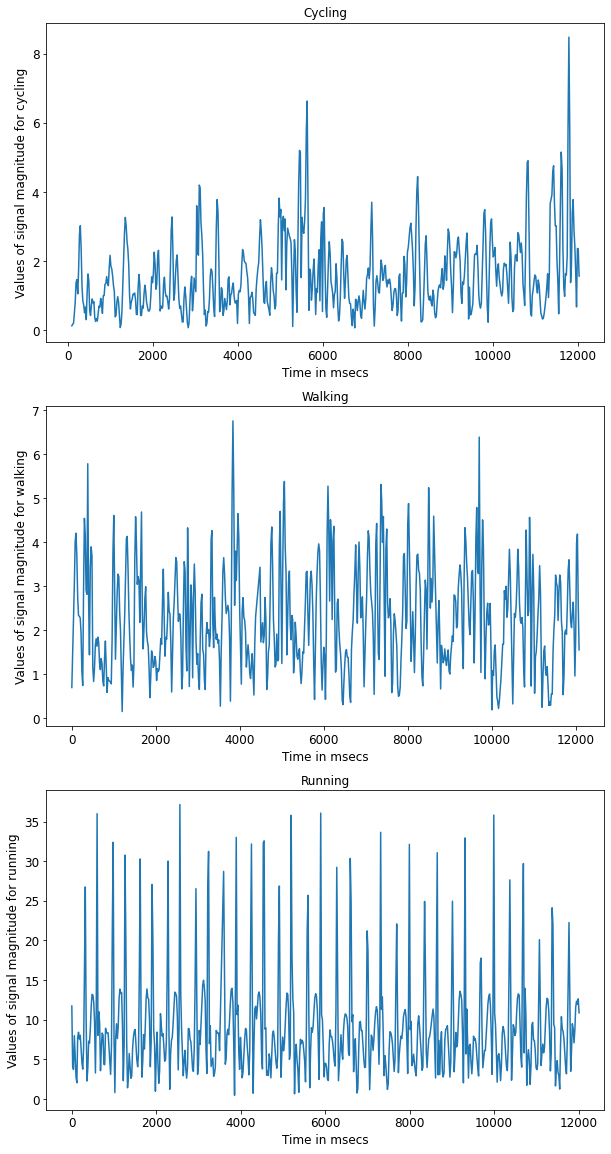

In [206]:
#Take the first sample of each activity from the dictionaries of magnitude 
magn_sample_walk = dict_magn_walk["1"]
magn_sample_cycl = dict_magn_cycl["1"]
magn_sample_run = dict_magn_run["1"]

#Create the plots
fig, (plot_cycl, plot_walk, plot_run) = plt.subplots(3, figsize=(10, 20))

#Plot for magnitude of cycling
plot_cycl.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for cycling")
plot_cycl.set_title("Cycling")
plot_cycl.plot(magn_sample_cycl[:,1], magn_sample_cycl[:,0], label="Cycling")

#Plot the magnitude of running
plot_run.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for running")
plot_run.set_title("Running")
plot_run.plot(magn_sample_run[:,1], magn_sample_run[:,0], label="Running")

#PLot the magnitude of walking
plot_walk.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for walking")
plot_walk.set_title("Walking")
plot_walk.plot(magn_sample_walk[:,1], magn_sample_walk[:,0], label="Walking")


As we can observe the three different activities have different peak values, width between them and frequencies at which these peaks are appear.


**Part of preparation phase:**

Before the calculation of these, a test for denoising the signal with butterworth low pass filter and median filter has to be performed:

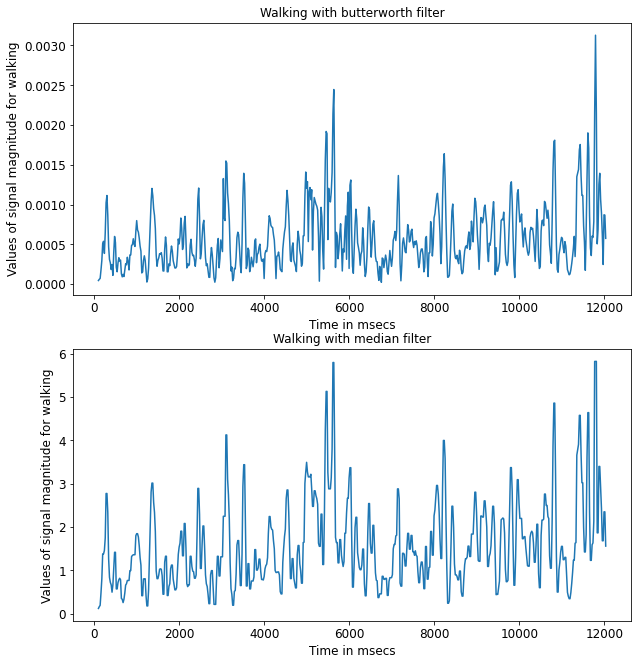

In [207]:
from scipy.signal import butter, freqz, lfilter
from scipy.signal import medfilt

#Determine the parameters of butterworth signal
def butter_lowpass(cut_off, fs, order):
    nyq = 0.5 * fs #fs is the frequency of sampling
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False) #b and a are the parameters
    return b,a

#Implementation of butterworth filter
def butter_low_pass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order) #Get the parameters
    y = lfilter(b ,a, data) #Filter the signal
    return y

order = 5 #Default value of the parameter order
fs = 200 #The frequency is 200 because the sampling was perfomed at 50Hz
cutoff = 15 #Default parameter cutoff

#Filter the magnitude of the first cycling sample  
data_test = dict_magn_cycl["1"]
data_test_res = data_test[:,0].reshape((len(data_test[:,0]) ,1)) #Get the sample in the appropriate form for the butterworth filter

test_butter = butter_low_pass_filter(data_test_res, cutoff, fs, order) #Filter with butterworth
test_median = medfilt(data_test[:,0]) #Filter with median


#Create the plots of filtered signals
fig, (plot_butter, plot_median) = plt.subplots(2, figsize=(10, 11))

#Plot for the signal filtered by butterworth
plot_butter.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for walking")
plot_butter.set_title("Walking with butterworth filter")
plot_butter.plot(data_test[:,1], test_butter, label="Walking")

#Plot for the signal filtered by median
plot_median.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for walking")
plot_median.set_title("Walking with median filter")
plot_median.plot(data_test[:,1], test_median, label="Walking")


As we can observe median filter has a result in signal in contrast with butterworth filter. So, let denoise all samples with median filter:

In [7]:
from scipy.signal import medfilt

#Initialize the arrays where the filtered signal will be stored
denois_run_magn = np.zeros((num_values, 2))
denois_walk_magn = np.zeros((num_values, 2))
denois_cycl_magn = np.zeros((num_values, 2))

denois_run_z = np.zeros((num_values, 2))
denois_walk_z = np.zeros((num_values, 2))
denois_cycl_z = np.zeros((num_values, 2))

#Each filtered sample for Z-axis and X-Y magnitude will be stored in a dictionary 
dict_denois_run = {}
dict_denois_walk = {}
dict_denois_cycl = {}

for sample in range(sample_size):
    
    #Get the samples of magnitude of each activity form the dictionaries
    sample_run_magn = dict_magn_run[str(sample)].copy() 
    sample_walk_magn = dict_magn_walk[str(sample)].copy() 
    sample_cycl_magn = dict_magn_cycl[str(sample)].copy()
    
    #Get the samples form the dictionaries of the cutted signals where is the Z-axis of each activity 
    sample_run_z = cutted_running[str(sample)].copy() 
    sample_walk_z = cutted_walking[str(sample)].copy()
    sample_cycl_z = cutted_cycling[str(sample)].copy()
    
    #Filter the X-Y magnitude and Z-axis signal for running
    denois_run_magn[:,0] = medfilt(sample_run_magn[:,0]) #Magnitude of running
    denois_run_magn[:,1] = sample_run_magn[:,1] #Store the time also
    denois_run_z[:,0] = medfilt(sample_run_z[:,2]) #Z-axis of running
    denois_run_z[:,1] = sample_run_z[:,3] #Store the time 
    
    #Filter the X-Y magnitude and Z-axis signal for walking
    denois_walk_magn[:,0] = medfilt(sample_walk_magn[:,0]) #Magnitude of walking
    denois_walk_magn[:,1] = sample_walk_magn[:,1] #Store the time 
    denois_walk_z[:,0] = medfilt(sample_walk_z[:,2]) #Z-axis of walking
    denois_walk_z[:,1] = sample_walk_z[:,3] #Store the time
    
    #Filter the X-Y magnitude and Z-axis signal for cycling
    denois_cycl_magn[:,0] = medfilt(sample_cycl_magn[:,0]) #Magnitude of cycling
    denois_cycl_magn[:,1] = sample_cycl_magn[:,1] #Store the time
    denois_cycl_z[:,0] = medfilt(sample_cycl_z[:,2]) #Z-axis of cycling
    denois_cycl_z[:,1] = sample_cycl_z[:,3] #Store the time
    
    #Store the filtered signals of each sample in the corresponding dictionary
    dict_denois_run[str(sample)] = {"magnitude": denois_run_magn.copy(), "z":denois_run_z.copy()}
    dict_denois_walk[str(sample)] = {"magnitude": denois_walk_magn.copy(), "z":denois_walk_z.copy()}
    dict_denois_cycl[str(sample)] = {"magnitude": denois_cycl_magn.copy(), "z":denois_cycl_z.copy() }
       


A possible feature might be extracted by the velocity signal of a sample. We can compute the velocity based on acceleration and time by getting the cumulative integrated value of signal using composite trapezoidal rule. Let make the plots for the velocity of each activity and compute the velocity for all the samples in Z-axis:

In [11]:
import scipy.integrate as it

#Compute velocity for all samples

axis = "z" #Only for the Z-axis

#Initialize the dictionaries where the velocity of Z-axis will be stored
velocity_run = {}
velocity_walk = {}
velocity_cycl = {}

for sample in range(sample_size):
        
        #Initialize the arrays for each kind of sample
        velocity_run[sample] = np.zeros((num_values, 1))
        velocity_walk[sample] = np.zeros((num_values, 1))
        velocity_cycl[sample] = np.zeros((num_values, 1))
        
        #Calculate the velocity for each activity with cumtrapz function and store it 
        velocity_run[sample] = it.cumtrapz( dict_denois_run[str(sample)][axis][:,0], dict_denois_run[str(sample)][axis][:,1], initial=0)
        velocity_walk[sample] = it.cumtrapz( dict_denois_walk[str(sample)][axis][:,0], dict_denois_walk[str(sample)][axis][:,1], initial=0)
        velocity_cycl[sample] = it.cumtrapz( dict_denois_cycl[str(sample)][axis][:,0], dict_denois_cycl[str(sample)][axis][:,1], initial=0)
        
        

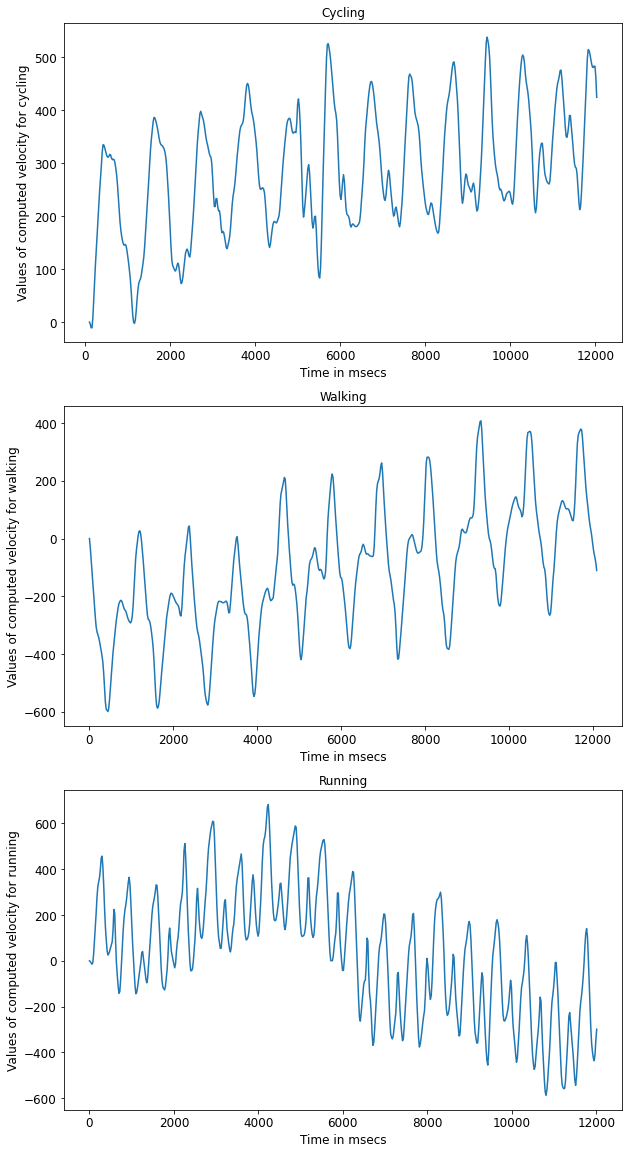

In [209]:
import scipy.integrate as it


#Plots of a sample for each of three activities
sample = "1" #Get the first sample of each activity
axis = "z" #Only for the Z-axis

#Compute velocity for running sample
run_velocity = it.cumtrapz( dict_denois_run[sample][axis][:,0], dict_denois_run[sample][axis][:,1], initial=0) 

#Compute velocity for walking sample
walk_velocity = it.cumtrapz( dict_denois_walk[sample][axis][:,0], dict_denois_walk[sample][axis][:,1], initial=0)

#Compute velocity for cycling sample
cycl_velocity = it.cumtrapz( dict_denois_cycl[sample][axis][:,0], dict_denois_cycl[sample][axis][:,1], initial=0)

#Create the plots
fig, (plot_cycl, plot_walk, plot_run) = plt.subplots(3, figsize=(10, 20))

#Plot cycling sample
plot_cycl.set(xlabel = "Time in msecs", ylabel = "Values of computed velocity for cycling")
plot_cycl.set_title("Cycling")
plot_cycl.plot(dict_denois_cycl[sample][axis][:,1], cycl_velocity, label="Cycling")

#Plot running sample
plot_run.set(xlabel = "Time in msecs", ylabel = "Values of computed velocity for running")
plot_run.set_title("Running")
plot_run.plot(dict_denois_run[sample][axis][:,1], run_velocity, label="Running")

#Plot walking sample
plot_walk.set(xlabel = "Time in msecs", ylabel = "Values of computed velocity for walking")
plot_walk.set_title("Walking")
plot_walk.plot(dict_denois_walk[sample][axis][:,1], walk_velocity, label="Walking")

After experimentantion, it was observed that the velocity in X-Y magnitude is just ascenting straight lines with no differences between different activities. On the other hand, for Z-axis it was found out that the velocity varies for the different activities but the assuming of zero initial velocity affects the results. This means that in some samples the velocity is descendant, in others is ascendant and in some is stable. However, maybe the dominant frequency is an efficient feature. Thus, we will compute it afterwards with the dominant frequencies of the X-Y and Z acceleration.

At this point, we will make the plots for the magnitude of a signal sample of each kind of activity noting down the peaks:

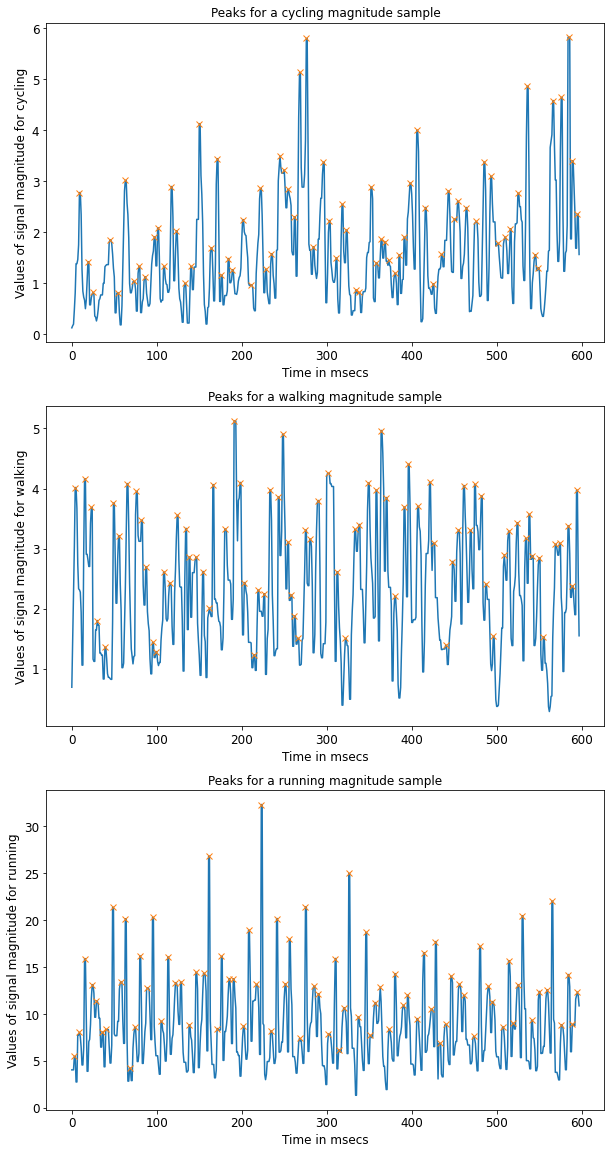

In [355]:
from scipy.signal import chirp, find_peaks, peak_widths
import statistics

#Get the first sample of denoised  running signal
test_run_magn = dict_denois_run["1"]

#Get only the magnitude of this
test_run = test_run_magn["magnitude"]

#Find the peaks for running sample
peaks_run, _ = find_peaks(test_run[:,0])
test_t_run = test_run[:,0] #Store the values of the signal to use it on the plot with the peaks


#Get the first sample of denoised walking signal
test_walk_magn = dict_denois_walk["1"]
test_walk = test_walk_magn["magnitude"]

#Find the peaks for walking sample
peaks_walk, _ = find_peaks(test_walk[:,0])
test_t_walk = test_walk[:,0]


#Get the first sample of denoised cycling signal
test_cycl_magn = dict_denois_cycl["1"]
test_cycl = test_cycl_magn["magnitude"]

#Find the peaks for cycling sample
peaks_cycl, _ = find_peaks(test_cycl[:,0])
test_t_cycl = test_cycl[:,0]


#Create the plots
fig, (plot_peak_cycl, plot_peak_walk, plot_peak_run) = plt.subplots(3, figsize=(10, 20))

#Plot for the running sample
plot_peak_run.set_title("Peaks for a running magnitude sample")
plot_peak_run.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for running")
plot_peak_run.plot(test_t_run) #Plot the values of the signal
plot_peak_run.plot(peaks_run, test_t_run[peaks_run], "x") #Plot the peaks based on the signal values

#Plot for the walking sample
plot_peak_walk.set_title("Peaks for a walking magnitude sample")
plot_peak_walk.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for walking")
plot_peak_walk.plot(test_t_walk)
plot_peak_walk.plot(peaks_walk, test_t_walk[peaks_walk], "x")

#Plot for the cycling sample
plot_peak_cycl.set_title("Peaks for a cycling magnitude sample")
plot_peak_cycl.set(xlabel = "Time in msecs", ylabel = "Values of signal magnitude for cycling")
plot_peak_cycl.plot(test_t_cycl)
plot_peak_cycl.plot(peaks_cycl, test_t_cycl[peaks_cycl], "x")

As we can find out the peak values of the signal are differentiated for each activity. For example, running max peak values seems to be greater than the other activities. This fact might lead the average peak value of running highier. Also, a useful difference might be the width between the highier peaks. For instance, at the walking sample the width of these peaks seems to be greater than that of running sample. In addition, the frequency that the peaks appear at the cycling sample is shown to be less compared to the other activities.

Thus, peak values should be found and average peak values should be computed for every sample X-Y magnitude and Z-axis accelaration signal. Also, some common features for this kind of signal are statistics like the mean and standard deviation. Therefore, these are computed below for every sample both for X-Y magnitude and Z-axis:

In [8]:
from scipy.signal import chirp, find_peaks, peak_widths
import statistics

#Initialize the dictionaries in which all the features values will be stored. 
#Each feature will consist of a numpy array with N X 1 dimensions, where N is the sample size of each activity.   
features_run = {}
features_walk = {}
features_cycl = {}

#Initialize the arrays for the feature values of average peak value of magnitude signal
run_average_peak_value_magn = np.zeros((sample_size, 1))
walk_average_peak_value_magn = np.zeros((sample_size, 1))
cycl_average_peak_value_magn = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of average peak width of magnitude signal
run_average_peak_width_magn = np.zeros((sample_size, 1))
walk_average_peak_width_magn = np.zeros((sample_size, 1))
cycl_average_peak_width_magn = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of mean of magnitude signal
run_mean_magn = np.zeros((sample_size, 1))
walk_mean_magn = np.zeros((sample_size, 1))
cycl_mean_magn = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of standard deviation of magnitude signal
run_std_magn = np.zeros((sample_size, 1))
walk_std_magn = np.zeros((sample_size, 1))
cycl_std_magn = np.zeros((sample_size, 1))


#Initialize the arrays for the feature values of average peak value of Z-axis signal
run_average_peak_value_z = np.zeros((sample_size, 1))
walk_average_peak_value_z = np.zeros((sample_size, 1))
cycl_average_peak_value_z = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of average peak width of Z-axis signal
run_average_peak_width_z = np.zeros((sample_size, 1))
walk_average_peak_width_z = np.zeros((sample_size, 1))
cycl_average_peak_width_z = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of mean of Z-axis signal
run_mean_z = np.zeros((sample_size, 1))
walk_mean_z = np.zeros((sample_size, 1))
cycl_mean_z = np.zeros((sample_size, 1))

#Initialize the arrays for the feature values of standard deviation of Z-axis signal
run_std_z = np.zeros((sample_size, 1))
walk_std_z = np.zeros((sample_size, 1))
cycl_std_z = np.zeros((sample_size, 1))

#Compute all the above mentioned features for each sample
for sample in range(sample_size):
    
    #Get a denoised running sample
    run = dict_denois_run[str(sample)].copy()
    run_magn = run["magnitude"] #Get the magnitude of the running sample
    run_z = run["z"] #Get the Z-axis of the running sample
    
    #Get a denoised walking sample
    walk = dict_denois_walk[str(sample)].copy()
    walk_magn = walk["magnitude"] #Get the magnitude of the walking sample
    walk_z = walk["z"] #Get the Z-axis of the walking sample
    
    #Get a denoised cycling sample
    cycl = dict_denois_cycl[str(sample)].copy()
    cycl_magn = cycl["magnitude"] #Get the magnitude of the cycling sample
    cycl_z = cycl["z"] #Get the Z-axis of the cycling sample     
    
    
    
    #Find the peaks of the magnitude of the running sample
    peaks, _ = find_peaks(run_magn[:,0])
    
    #Calculate the average of these peaks of magnitude running sample
    run_average_peak_value_magn[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the magnitude running sample
    results_full = peak_widths(run_magn[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the magnitude running sample
    run_average_peak_width_magn[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the magnitude running sample
    run_mean_magn[sample] = statistics.mean(run_magn[:,0])
    
    #Calculate the standard deviation of the magnitude running sample
    run_std_magn[sample] = statistics.stdev(run_magn[:,0])
    
    
    #Find the peaks of the Z-axis signal of the running sample
    peaks, _ = find_peaks(run_z[:,0])
    
    #Calculate the average of these peaks of Z-axis running sample
    run_average_peak_value_z[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the Z-axis running sample
    results_full = peak_widths(run_z[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the Z-axis running sample
    run_average_peak_width_z[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the Z-axis running sample
    run_mean_z[sample] = statistics.mean(run_z[:,0])
    
    #Calculate the standard deviation of the Z-axis running sample
    run_std_z[sample] = statistics.stdev(run_z[:,0])
    
    
    
    #Find the peaks of the magnitude of the walking sample
    peaks, _ = find_peaks(walk_magn[:,0])
    
    #Calculate the average of these peaks of magnitude walking sample
    walk_average_peak_value_magn[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the magnitude walking sample
    results_full = peak_widths(walk_magn[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the magnitude walking sample
    walk_average_peak_width_magn[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the magnitude walking sample
    walk_mean_magn[sample] = statistics.mean(walk_magn[:,0])
    
    #Calculate the standard deviation of the magnitude walking sample
    walk_std_magn[sample] = statistics.stdev(walk_magn[:,0])
    
    
    #Find the peaks of the Z-axis signal of the walking sample
    peaks, _ = find_peaks(walk_z[:,0])
    
    #Calculate the average of these peaks of Z-axis walking sample
    walk_average_peak_value_z[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the Z-axis walking sample
    results_full = peak_widths(walk_z[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the Z-axis walking sample
    walk_average_peak_width_z[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the Z-axis walking sample
    walk_mean_z[sample] = statistics.mean(walk_z[:,0])
    
    #Calculate the standard deviation of the Z-axis walking sample
    walk_std_z[sample] = statistics.stdev(walk_z[:,0])
    
    
    
    #Find the peaks of the magnitude of the cycling sample
    peaks, _ = find_peaks(cycl_magn[:,0])
    
    #Calculate the average of these peaks of magnitude cycling sample
    cycl_average_peak_value_magn[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the magnitude walking sample
    results_full = peak_widths(cycl_magn[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the magnitude cycling sample
    cycl_average_peak_width_magn[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the magnitude cycling sample
    cycl_mean_magn[sample] = statistics.mean(cycl_magn[:,0])
    
    #Calculate the standard deviation of the magnitude cycling sample
    cycl_std_magn[sample] = statistics.stdev(cycl_magn[:,0])
    
    
    #Find the peaks of the Z-axis signal of the cycling sample
    peaks, _ = find_peaks(cycl_z[:,0])
    
    #Calculate the average of these peaks of Z-axis cycling sample
    cycl_average_peak_value_z[sample] = statistics.mean(peaks.copy())
    
    #Find the widths of higher peaks of the Z-axis cycling sample
    results_full = peak_widths(cycl_z[:,0], peaks, rel_height=1)
    
    #Calculate the average of these widths of the Z-axis cycling sample
    cycl_average_peak_width_z[sample] = statistics.mean(results_full[0])
    
    #Calculate the mean of the Z-axis cycling sample
    cycl_mean_z[sample] = statistics.mean(cycl_z[:,0])
    
    #Calculate the standard deviation of the Z-axis cycling sample
    cycl_std_z[sample] = statistics.stdev(cycl_z[:,0])
    

#Store the features to the corresponding dictionary    
    
features_run["average_peak_value_magn"] = run_average_peak_value_magn
features_run["average_peak_width_magn"] = run_average_peak_width_magn
features_run["mean_magn"] = run_mean_magn
features_run["std_magn"] = run_std_magn
features_run["average_peak_value_z"] = run_average_peak_value_z
features_run["average_peak_width_z"] = run_average_peak_width_z
features_run["mean_z"] = run_mean_z
features_run["std_z"] = run_std_z

features_walk["average_peak_value_magn"] = walk_average_peak_value_magn
features_walk["average_peak_width_magn"] = walk_average_peak_width_magn
features_walk["mean_magn"] = walk_mean_magn
features_walk["std_magn"] = walk_std_magn
features_walk["average_peak_value_z"] = walk_average_peak_value_z
features_walk["average_peak_width_z"] = walk_average_peak_width_z
features_walk["mean_z"] = walk_mean_z
features_walk["std_z"] = walk_std_z

features_cycl["average_peak_value_magn"] = cycl_average_peak_value_magn
features_cycl["average_peak_width_magn"] = cycl_average_peak_width_magn
features_cycl["mean_magn"] = cycl_mean_magn
features_cycl["std_magn"] = cycl_std_magn
features_cycl["average_peak_value_z"] = cycl_average_peak_value_z
features_cycl["average_peak_width_z"] = cycl_average_peak_width_z
features_cycl["mean_z"] = cycl_mean_z
features_cycl["std_z"] = cycl_std_z


Afterwards, Fast Fourier Trasform should be applied at a sample of each kind in Z-axis and be visualized :

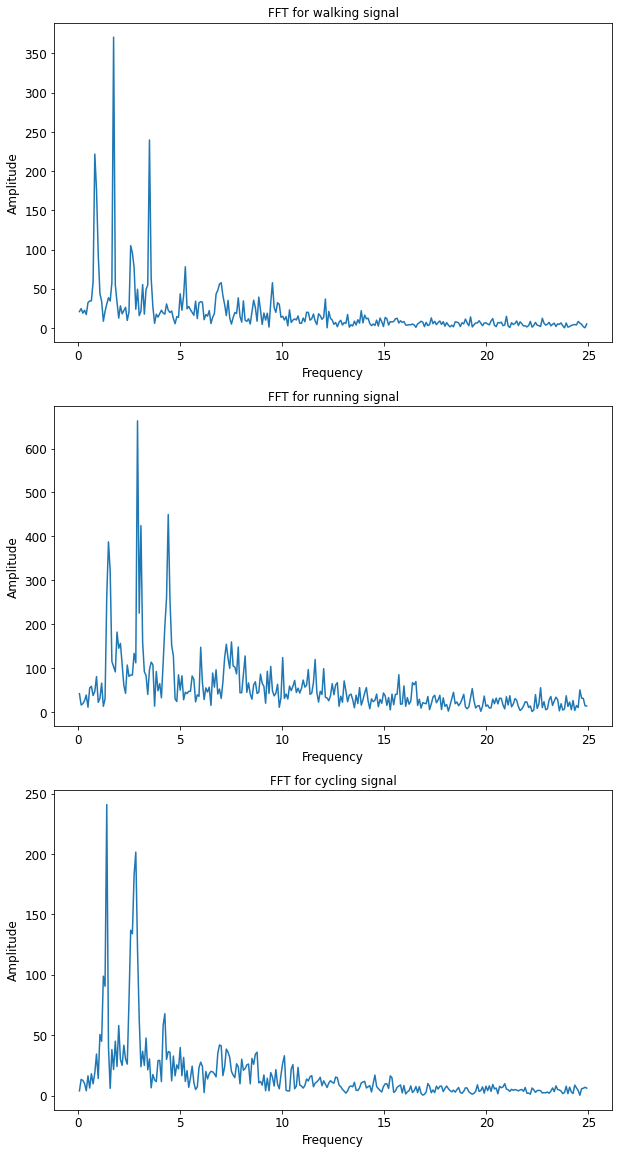

In [357]:
from scipy.fft import fft, fftfreq

SAMPLE_RATE = 50  #Hertz

N = num_values #The number of values of each signal sample

#Get a denoised walking sample
test = dict_denois_walk["3"].copy()
test_z = test["z"] #Get the Z-axis of the walking sample
test_walk = test_z[:,0] #Get only the values, without time
yf = fft(test_walk) #Apply FFT to the Z-axis walking sample and store the values
xf = fftfreq(N, 1 / SAMPLE_RATE) #Get the frequencies based on the sample rate 
yf_walk = yf[np.where(xf > 0)] #Keep only the values of positive frequencies, because the plot is symmetrical 
xf_walk = xf[np.where(xf > 0)] #Keep only the positve frequencies


#Get a denoised running sample
test = dict_denois_run["3"].copy()
test_z = test["z"] #Get the Z-axis of the running sample
test_run = test_z[:,0] 
yf = fft(test_run) #Apply FFT to the Z-axis running sample and store the values
xf = fftfreq(N, 1 / SAMPLE_RATE)
yf_run = yf[np.where(xf > 0)]
xf_run = xf[np.where(xf > 0)]


#Get a denoised cycling sample
test = dict_denois_cycl["3"].copy()
test_z = test["z"] #Get the Z-axis of the cycling sample
test_cycl = test_z[:,0] 
yf = fft(test_cycl) #Apply FFT to the Z-axis cycling sample and store the values
xf = fftfreq(N, 1 / SAMPLE_RATE)
yf_cycl = yf[np.where(xf > 0)]
xf_cycl = xf[np.where(xf > 0)]


#Create the plots of the transformed signals
fig, (plot_walk, plot_run, plot_cycl) = plt.subplots(3, figsize=(10, 20))

#Plot of walking tranformed signal
plot_walk.set(xlabel = "Frequency", ylabel = "Amplitude")
plot_walk.set_title("FFT for walking signal")
plot_walk.plot(xf_walk, np.abs(yf_walk), label="Walking") #Plot the absolute of FFT values (amplitude)

#Plot of running tranformed signal
plot_run.set(xlabel = "Frequency", ylabel = "Amplitude")
plot_run.set_title("FFT for running signal")
plot_run.plot(xf_run, np.abs(yf_run), label="Running") 

#Plot of cycling tranformed signal
plot_cycl.set(xlabel = "Frequency", ylabel = "Amplitude")
plot_cycl.set_title("FFT for cycling signal")
plot_cycl.plot(xf_cycl, np.abs(yf_cycl), label="cycling")


After experimentation, it was find out that at many samples of walking, the dominant frequency is less than the most samples of running. 
Furthermore, dominant frequency of cycling samples is the least than in the others activities. 
In addition, the amplitude of dominant frequency seems to be different for the different activities.
These observations was for Z-axis signals. For the X-Y magnitude signals, it seems that there are no interesting patterns.  

Below, FFT at all samples is applied in Z-axis. Dominant frequency values and amplitude of dominant frequency are calculated. Also, FFT is applied for velocity signals in order to calculate the dominant frequencies for these:

In [12]:
from scipy.fft import fft, fftfreq

SAMPLE_RATE = 50  #Hertz

N = num_values #The number of values of each signal sample


#Initialize arrays for the feature of dominant frequency amplitude in Z-axis  
run_dom_fr_ampl = np.zeros((sample_size, 1))
walk_dom_fr_ampl = np.zeros((sample_size, 1))
cycl_dom_fr_ampl = np.zeros((sample_size, 1))

#Initialize arrays for the feature of dominant frequency value in Z-axis
run_dom_fr_val = np.zeros((sample_size, 1))
walk_dom_fr_val = np.zeros((sample_size, 1))
cycl_dom_fr_val = np.zeros((sample_size, 1))

#Initialize arrays for the feature of dominant frequency value of velocity 
run_VDFV = np.zeros((sample_size, 1))
walk_VDFV = np.zeros((sample_size, 1))
cycl_VDFV = np.zeros((sample_size, 1))

#Initialize arrays for the feature of dominant frequency of velocity 
run_VDFA = np.zeros((sample_size, 1))
walk_VDFA = np.zeros((sample_size, 1))
cycl_VDFA = np.zeros((sample_size, 1))


#For each sample calculate the above mentioned features
for sample in range(sample_size):

    #Compute FFT, dominant frequency value and dominant frequency amplitude of running sample for accelaration in Z-axis 
    run = dict_denois_run[str(sample)].copy()
    run_z = run["z"]
    yf_r = fft(run_z[:,0])
    xf_r = fftfreq(N, 1 / SAMPLE_RATE)
    yf_run = yf_r[np.where(xf_r > 0)] 
    xf_run = xf_r[np.where(xf_r > 0)]
    peak_freq = np.argmax(yf_run) #Get the index of the frequency with the highier peak which is the dominant frequency
    run_dom_fr_ampl[sample] = np.abs(yf_run[peak_freq]) #Get the absolute amplitude of dominant freq in order to be comparable
    run_dom_fr_val[sample] = xf_run[peak_freq] #Get the dominant frequency
    
    #Compute FFT, dominant frequency value and dominant frequency amplitude of walking sample for accelaration in Z-axis 
    walk = dict_denois_walk[str(sample)].copy()
    walk_z = walk["z"]
    yf_w = fft(walk_z[:,0])
    xf_w = fftfreq(N, 1 / SAMPLE_RATE)
    yf_walk = yf_w[np.where(xf_w > 0)] 
    xf_walk = xf_w[np.where(xf_w > 0)]
    peak_freq = np.argmax(yf_walk) 
    walk_dom_fr_ampl[sample] = np.abs(yf_walk[peak_freq])
    walk_dom_fr_val[sample] = xf_walk[peak_freq]
    
    #Compute FFT, dominant frequency value and dominant frequency amplitude of cycling sample for accelaration in Z-axis
    cycl = dict_denois_cycl[str(sample)].copy()
    cycl_z = cycl["z"] 
    yf_c = fft(cycl_z[:,0])
    xf_c = fftfreq(N, 1 / SAMPLE_RATE)
    yf_cycl = yf_c[np.where(xf_c > 0)] 
    xf_cycl = xf_c[np.where(xf_c > 0)]
    peak_freq = np.argmax(yf_cycl) 
    cycl_dom_fr_ampl[sample] = np.abs(yf_cycl[peak_freq])
    cycl_dom_fr_val[sample] = xf_cycl[peak_freq]
    
    #Compute FFT, dominant frequency value and dominant frequency amplitude of running sample for velocity in Z-axis
    yf_vr = fft(velocity_run[sample])
    xf_vr = fftfreq(N, 1 / SAMPLE_RATE)
    yf_vrun = yf_vr[np.where(xf_vr > 0)] 
    xf_vrun = xf_vr[np.where(xf_vr > 0)]
    peak_freq = np.argmax(yf_vrun)
    run_VDFA[sample] = np.abs(yf_vrun[peak_freq])
    run_VDFV[sample] = xf_vrun[peak_freq]
    
    #Compute FFT, dominant frequency value and dominant frequency amplitude of walking sample for velocity in Z-axis
    yf_vw = fft(velocity_walk[sample])
    xf_vw = fftfreq(N, 1 / SAMPLE_RATE)
    yf_vwalk = yf_vw[np.where(xf_vw > 0)] 
    xf_vwalk = xf_vw[np.where(xf_vw > 0)]
    peak_freq = np.argmax(yf_vwalk) 
    walk_VDFA[sample] = np.abs(yf_vwalk[peak_freq])
    walk_VDFV[sample] = xf_vwalk[peak_freq]
    
    #Compute FFT, dominant frequency value and dominant frequency amplitude of cycling sample for velocity in Z-axis
    yf_vc = fft(velocity_cycl[sample])
    xf_vc = fftfreq(N, 1 / SAMPLE_RATE)
    yf_vcycl = yf_vc[np.where(xf_vw > 0)] 
    xf_vcycl = xf_vc[np.where(xf_vw > 0)]
    peak_freq = np.argmax(yf_vcycl)
    cycl_VDFA[sample] = np.abs(yf_vcycl[peak_freq])
    cycl_VDFV[sample] = xf_vcycl[peak_freq]
    

#Store each of the above features to the corresponding dictionary

features_run["dom_fr_ampl"] = run_dom_fr_ampl
features_run["dom_fr_val"] = run_dom_fr_val
features_run["VDFA"] = run_VDFA
features_run["VDFV"] = run_VDFV

features_walk["dom_fr_ampl"] = walk_dom_fr_ampl
features_walk["dom_fr_val"] = walk_dom_fr_val
features_walk["VDFA"] = walk_VDFA
features_walk["VDFV"] = walk_VDFV

features_cycl["dom_fr_ampl"] = cycl_dom_fr_ampl
features_cycl["dom_fr_val"] = cycl_dom_fr_val
features_cycl["VDFA"] = cycl_VDFA
features_cycl["VDFV"] = cycl_VDFV



Now, the *power spectral density (PSD)* of Z-axis signal is vizualized for one sample of each activity. 

As power spectal density is meant to be the estimation of the signal power at different frequencies using Welch's method.

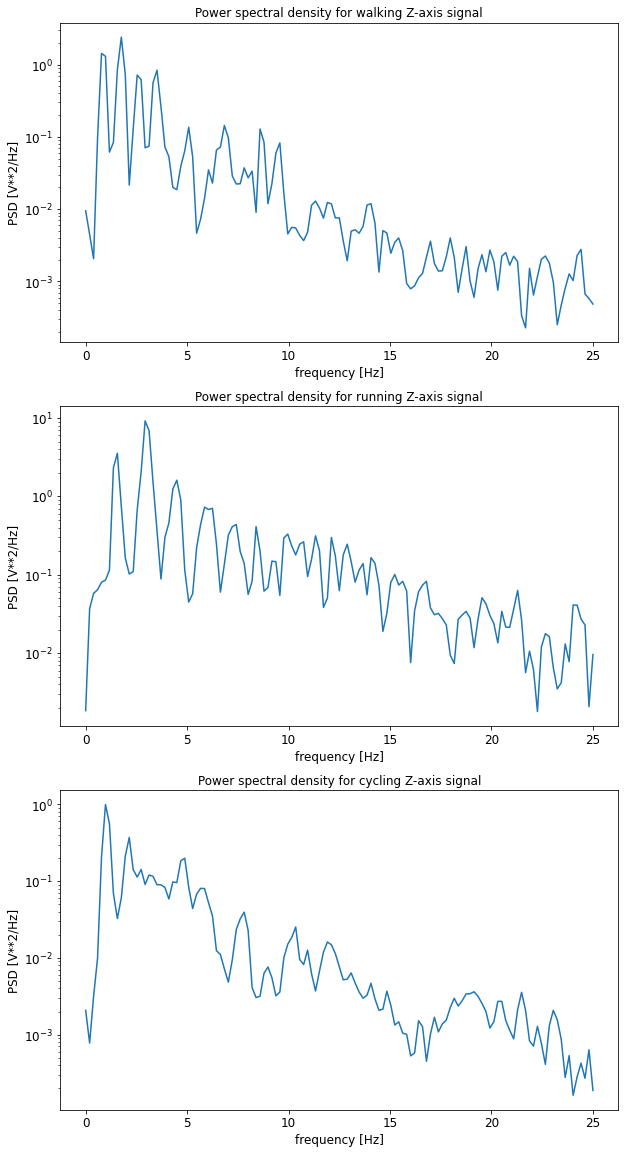

In [217]:
from scipy import signal

#Compute spectral density for a walking sample in Z-axis
#Spectral density is calculated using the function signal.welch() from scipy
f_walk, Pxx_den_walk = signal.welch(dict_denois_walk["1"]["z"][:,0], SAMPLE_RATE)

#Compute spectral density for a running sample in Z-axis
f_run, Pxx_den_run = signal.welch(dict_denois_run["1"]["z"][:,0], SAMPLE_RATE)

#Compute spectral density for a cycling sample in Z-axis
f_cycl, Pxx_den_cycl = signal.welch(dict_denois_cycl["1"]["z"][:,0], SAMPLE_RATE)


#Create the plots of spectral density of each sample
fig, (plot_walk, plot_run, plot_cycl) = plt.subplots(3, figsize=(10, 20))

#Plot of walking sample
plot_walk.set(xlabel = "frequency [Hz]", ylabel = "PSD [V**2/Hz]")
plot_walk.set_title("Power spectral density for walking Z-axis signal")
plot_walk.semilogy(f_walk, Pxx_den_walk, label="Walking") #f_walk is the array with the frequencies 
                                                          # and Pxx_dens_walk is the array with the values of PSD of the signal

#Plot of running sample    
plot_run.set(xlabel = "frequency [Hz]", ylabel = "PSD [V**2/Hz]")
plot_run.set_title("Power spectral density for running Z-axis signal")
plot_run.semilogy(f_run, Pxx_den_run, label="Running")

#Plot of cycling sample
plot_cycl.set(xlabel = "frequency [Hz]", ylabel = "PSD [V**2/Hz]")
plot_cycl.set_title("Power spectral density for cycling Z-axis signal")
plot_cycl.semilogy(f_cycl, Pxx_den_cycl, label="Cycling")

As we can observe from the above plots there are some differences in spectral density Z-axis signals between the three activities. These differences may vary among the samples of the same type but the entropy of spectral density should be considered as a possible feature because it is a commonplace for this kind of signals. The same should be done for X-Y magnitude. 

Spectral Entropy is defined to be the Shannon entropy of the power spectral density (PSD):
H(x, fs) = Σ P(f)log2(P(f)), where x is the given signal, P is the normalised PSD, fs is the sampling frequency and the summary Σ is performed for the values of f = {0, ..., fs/2}. 

In [13]:
from entropy import spectral_entropy

#Initialize arrays for the feature of spectral density of Z-axis 
run_spectral_entropy_z = np.zeros((sample_size, 1))
walk_spectral_entropy_z = np.zeros((sample_size, 1))
cycl_spectral_entropy_z = np.zeros((sample_size, 1))

#Initialize arrays for the feature of spectral density of X-Y magnitude 
run_spectral_entropy_magn = np.zeros((sample_size, 1))
walk_spectral_entropy_magn = np.zeros((sample_size, 1))
cycl_spectral_entropy_magn = np.zeros((sample_size, 1))

#Compute spectral entropy of Z-axis and X-Y magnitude for all samples
for sample in range(sample_size):
    
    #Compute spactral entropy of running sample for Z-axis 
    #Spectral entropy is calculated using the function spectral_entropy(method='welch') from entropy.
    #This library was found and dowloaded from here: https://raphaelvallat.com/entropy/build/html/index.html.
    run_spectral_entropy_z[sample] = spectral_entropy(dict_denois_run[str(sample)]["z"][:,0], SAMPLE_RATE, method='welch')
    
    #Compute spactral entropy of running sample for X-Y magnitude
    run_spectral_entropy_magn[sample] = spectral_entropy(dict_denois_run[str(sample)]["magnitude"][:,0], SAMPLE_RATE, method='welch')
    
    
    #Compute spactral entropy of walking sample for Z-axis
    walk_spectral_entropy_z[sample] = spectral_entropy(dict_denois_walk[str(sample)]["z"][:,0], SAMPLE_RATE, method='welch')
    
    #Compute spactral entropy of walking sample for X-Y magnitude
    walk_spectral_entropy_magn[sample] = spectral_entropy(dict_denois_walk[str(sample)]["magnitude"][:,0], SAMPLE_RATE, method='welch')
    
    
    #Compute spactral entropy of cycling sample for Z-axis
    cycl_spectral_entropy_z[sample] = spectral_entropy(dict_denois_cycl[str(sample)]["z"][:,0], SAMPLE_RATE, method='welch')
    
    #Compute spactral entropy of cycling sample for X-Y magnitude
    cycl_spectral_entropy_magn[sample] = spectral_entropy(dict_denois_cycl[str(sample)]["magnitude"][:,0], SAMPLE_RATE, method='welch')

    
#Store the above features to the corresponding dictionary
    
features_run["spec_entr_z"] = run_spectral_entropy_z.copy()
features_run["spec_entr_magn"] = run_spectral_entropy_magn.copy()

features_walk["spec_entr_z"] = walk_spectral_entropy_z.copy()
features_walk["spec_entr_magn"] = walk_spectral_entropy_magn.copy()

features_cycl["spec_entr_z"] = cycl_spectral_entropy_z.copy()
features_cycl["spec_entr_magn"] = cycl_spectral_entropy_magn.copy()

Then, the skewness and kurtosis for both of Z-axis signal and X-Y magnitude will be computed because they are common statistics in signal analysis. 

In [14]:
from scipy.stats import kurtosis
from scipy.stats import skew

#Initialize arrays for the feature of kurtosis for Z-axis 
run_kurtosis_z = np.zeros((sample_size, 1))
walk_kurtosis_z = np.zeros((sample_size, 1))
cycl_kurtosis_z = np.zeros((sample_size, 1))

#Initialize arrays for the feature of skewness for Z-axis
run_skewness_z = np.zeros((sample_size, 1))
walk_skewness_z = np.zeros((sample_size, 1))
cycl_skewness_z = np.zeros((sample_size, 1))

#Initialize arrays for the feature of kurtosis for X-Y magnitude
run_kurtosis_magn = np.zeros((sample_size, 1))
walk_kurtosis_magn = np.zeros((sample_size, 1))
cycl_kurtosis_magn = np.zeros((sample_size, 1))

#Initialize arrays for the feature of skewness for X-Y magnitude
run_skewness_magn = np.zeros((sample_size, 1))
walk_skewness_magn = np.zeros((sample_size, 1))
cycl_skewness_magn = np.zeros((sample_size, 1))

#Compute for each sample skewness and kurtosis for Z-axis and X-Y magnitude
for sample in range(sample_size):
    
    #Compute kurtosis of running sample for Z-axis
    #Kurtosis is calculated using the function kurtosis() from scipy.stats
    run_kurtosis_z[sample] = kurtosis(dict_denois_run[str(sample)]["z"][:,0])
    
    #Compute kurtosis of running sample for X-Y magnitude
    run_kurtosis_magn[sample] = kurtosis(dict_denois_run[str(sample)]["magnitude"][:,0])
    
    #Compute skewness of running sample for Z-axis
    #Skewness is calculated using the function skew() from scipy.stats 
    run_skewness_z[sample] = skew(dict_denois_run[str(sample)]["z"][:,0])
    
    #Compute skewness of running sample for X-Y magnitude 
    run_skewness_magn[sample] = skew(dict_denois_run[str(sample)]["magnitude"][:,0])
    
    
    #Compute kurtosis of walking sample for Z-axis
    walk_kurtosis_z[sample] = kurtosis(dict_denois_walk[str(sample)]["z"][:,0])
    
    #Compute kurtosis of walking sample for X-Y magnitude
    walk_kurtosis_magn[sample] = kurtosis(dict_denois_walk[str(sample)]["magnitude"][:,0])
    
    #Compute skewness of walking sample for Z-axis
    walk_skewness_z[sample] = skew(dict_denois_walk[str(sample)]["z"][:,0])
    
    #Compute skewness of walking sample for X-Y magnitude 
    walk_skewness_magn[sample] = skew(dict_denois_walk[str(sample)]["magnitude"][:,0])
    
    
    #Compute kurtosis of cycling sample for Z-axis
    cycl_kurtosis_z[sample] = kurtosis(dict_denois_cycl[str(sample)]["z"][:,0])
    
    #Compute kurtosis of cycling sample for X-Y magnitude
    cycl_kurtosis_magn[sample] = kurtosis(dict_denois_cycl[str(sample)]["magnitude"][:,0])
    
    #Compute skewness of cycling sample for Z-axis
    cycl_skewness_z[sample] = skew(dict_denois_cycl[str(sample)]["z"][:,0])
    
    #Compute skewness of cycling sample for X-Y magnitude
    cycl_skewness_magn[sample] = skew(dict_denois_cycl[str(sample)]["magnitude"][:,0])

    
#Store the above features to the corresponding dictionary

features_run["kurt_z"] = run_kurtosis_z.copy()
features_run["kurt_magn"] = run_kurtosis_magn.copy()
features_run["skewn_z"] = run_skewness_z.copy()
features_run["skewn_magn"] = run_skewness_magn.copy()

features_walk["kurt_z"] = walk_kurtosis_z.copy()
features_walk["kurt_magn"] = walk_kurtosis_magn.copy()
features_walk["skewn_z"] = walk_skewness_z.copy()
features_walk["skewn_magn"] = walk_skewness_magn.copy()

features_cycl["kurt_z"] = cycl_kurtosis_z.copy()
features_cycl["kurt_magn"] = cycl_kurtosis_magn.copy()  
features_cycl["skewn_z"] = cycl_skewness_z.copy()
features_cycl["skewn_magn"] = cycl_skewness_magn.copy()

Afterwards, the correlation matrix should be created for these 18 features to discover whether there is correlation among them. In order to do this, all features should be in a matrix NxF where N is the number of samples and F the number of features. Also, a table Fx1 is necessary where the names of features will be stored and a table Nx1 should be created to store the labels of the data.

Before of these, the overall dataset has to be split in train-validation set and test set. In order to have an unbiased test set to some extext, this should consist of samples which derive from more than one different persons. Also, none of the samples of these persons should be part of the train-validation set. Therefore, the train-validation set will consist of all the samples from the 4 first persons (subject1, ..., subject4) with 4 X 3 X 10 = 120 samples totally. The test set will consist of all the samples from the last 2 persons (subject5, subject6) with 2 X 3 X 10 = 60 samples totally. For both of the two sets the  number of samples of each activity are equal. In train-validation set the number of samples of each activity is 40 and the corresponding number in test set is 20.   

It should be noted that during the exploration phase the samples of the last 2 persons were not used because it had been already predifined that they will be the test set. For the same reason, they will not be used for the correlation matrix and the rest of feature evaluation procedure.

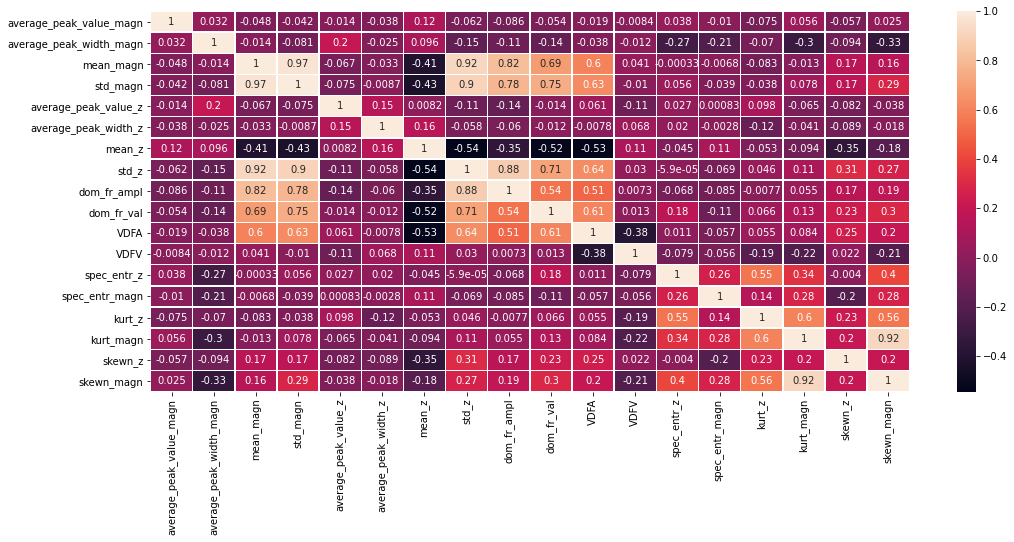

In [15]:
import pandas as pd
import seaborn as sns


#Array with the name of features
feature_names = np.empty((len(features_run), 1), dtype="<U23") #(len(features_run) = Number of features

#Make the train-validation set 
tr_val_set_size = int((sample_size/6)*4) #Train-validation set size of each activity is equal to (sample_size/6)*4=(60/6)*4=40 

#Initialize array of train-validation set
features = np.zeros((tr_val_set_size*3 , len(features_run))) #Overall size of train-validation set is tr_val_set_size*3=40*3=120
                                                            #"features" array is X which will be used at the fit() function of
                                                            #a classifier as .fit(X,y) .
#Initialize arrays of train-validation labels
labels = np.empty((tr_val_set_size*3, 1), dtype="<U23") #Labels of train-validation set in characters. Actually, this is y.
labels_as_numeric_values = np.zeros((tr_val_set_size*3, 1)) #Labels of train-validation set in numeric values. This also can be
                                                            #used as y.

#Make the test set
test_set_size = int((sample_size/6)*2) #Test set size of each activity is equal to (sample_size/6)*2=(60/6)*2=20 

#Initialize arrays of test set 
test_set_feat = np.zeros((test_set_size*3 , len(features_run))) #Overall size of test set is test_set_size*2=40*2=80
                                                                #"test_set_feat" array is X.
#Initialize arrays of test labels
test_set_labels = np.empty((test_set_size*3, 1), dtype="<U23") #Labels of test set in characters which is y.
test_set_labels_as_numeric_values = np.zeros((test_set_size*3, 1)) #Labels of test set in numeric values which also can be used
                                                                    #as y.

#Initialize and count the number of columns to determine the index column of feature arrays "features" and "test_set_feat". 
countcols = 0

#We need only the names of features, thus taking these from "feature_run" is the same as taking from "feature_walk"  
for feat in features_run:                                                                       #or from "feature_cycl"
    
    #Initialize the number of rows for each feature. Count these to determine the appropriate rows where the data will be stored
    #For instance, at "feature" array the features of running sample will be stored at rows 0-39 of each column. Respectively,
    #walking samples will be stored at rows 40-79 and cycling samples at rows 80-119. 
    #In the same way, the data for test set will be stored at "test_set_feat" array, but per 20 rows for each activity. 
    countrows = 0 #Rows for "feature" array
    count_test_rows =0 #Rows for "test_set_feat" array
    
    #Get all the data of running samples for a specific feature
    f = features_run[feat].copy()
    
    #Get the first 40 feature values of running samples from array "f" and put them at rows 0-39 of "feature" array
    features[countrows:tr_val_set_size, countcols] = f[0:tr_val_set_size,0].copy()
    
    #Get the rest 20 feature values of running sample from array "f" and put them at rows 0-19 of "test_set_feat" array
    test_set_feat[count_test_rows:test_set_size, countcols] = f[tr_val_set_size:,0].copy()
    
    
    countrows += tr_val_set_size #Add 40 to the train-validation counter of rows. Now countrows is equal to 40.
    count_test_rows += test_set_size #Add 20 to the test counter of rows. Now count_test_rows is equal to 20.
    
    
    #Get all the data of walking samples for a specific feature
    f = features_walk[feat].copy()
    
    #Get the first 40 feature values of walking samples from array "f" and put them at rows 40-79 of "feature" array
    features[countrows:(countrows+tr_val_set_size), countcols] = f[:tr_val_set_size,0].copy()
    
    #Get the rest 20 feature values of walking sample from array "f" and put them at rows 20-39 of "test_set_feat" array
    test_set_feat[count_test_rows:(count_test_rows+test_set_size), countcols] = f[tr_val_set_size:,0].copy()
   

    countrows += tr_val_set_size #Add 40 to the train-validation counter of rows. Now countrows is equal to 80.
    count_test_rows += test_set_size #Add 20 to the test counter of rows. Now count_test_rows is equal to 40.
    
    
    #Get all the data of cycling samples for a specific feature
    f = features_cycl[feat].copy()
    
    #Get the first 40 feature values of cycling samples from array "f" and put them at rows 80-119 of "feature" array
    features[countrows:(countrows+tr_val_set_size), countcols] = f[:tr_val_set_size,0].copy()
    
    #Get the rest 20 feature values of walking sample from array "f" and put them at rows 40-59 of "test_set_feat" array
    test_set_feat[count_test_rows:(count_test_rows+test_set_size), countcols] = f[tr_val_set_size:,0].copy()
    
    #Put the specific feature name to the array "feature_names". In this way, the order of the feature names in this array will 
    #be the same with the order of columns at arrays "feature" and "test_set_feat".
    feature_names[countcols,0] = feat
    
    countcols += 1 #Increase column index for the next feature

#Do the same procedure for label arrays    
countrows = 0
count_test_rows = 0

labels[countrows:tr_val_set_size, 0] = "running" #The rows 0-39 of "labels" array has to be "running".
labels_as_numeric_values[countrows:tr_val_set_size, 0] = 1 #The rows 0-39 of "labels_as_numeric_values" has to be 1. 
                                                            #The number 1 match to "running" 

test_set_labels[count_test_rows:test_set_size, 0] = "running" #The rows 0-19 of "test_set_labels" array has to be "running".
test_set_labels_as_numeric_values[count_test_rows:test_set_size, 0] = 1 #The rows 0-19 of "test_set_labels_as_numeric_values"
                                                                                                                #has to be 1.

#Increase counter as before
countrows += tr_val_set_size
count_test_rows += test_set_size


labels[countrows:(countrows+tr_val_set_size), 0] = "walking" #The rows 40-79 of "labels" array has to be "walking".
labels_as_numeric_values[countrows:(countrows+tr_val_set_size), 0] = 2 #The rows 40-79 of "labels_as_numeric_values" has to 
                                                                        # be 2. The number 2 match to "walking" 

test_set_labels[count_test_rows:(count_test_rows+test_set_size), 0] = "walking" #The rows 20-39 of "test_set_labels" 
                                                                                #array has to be "walking".

test_set_labels_as_numeric_values[count_test_rows:(count_test_rows+test_set_size), 0] = 2 #The rows 20-39 of 
                                                                            #"test_set_labels_as_numeric_values" has to be 2.

#Increase counter again
countrows += tr_val_set_size
count_test_rows += test_set_size
                  
     
labels[countrows:(countrows+tr_val_set_size), 0] = "cycling" #The rows 80-119 of "labels" array has to be "cycling".
labels_as_numeric_values[countrows:(countrows+tr_val_set_size), 0] = 3 #The rows 80-119 of "labels_as_numeric_values" has to 
                                                                        # be 3. The number 3 match to "cycling" 

test_set_labels[count_test_rows:(count_test_rows+test_set_size), 0] = "cycling" #The rows 40-59 of "test_set_labels" 
                                                                                #array has to be "cycling".
    
test_set_labels_as_numeric_values[count_test_rows:(count_test_rows+test_set_size), 0] = 3 #The rows 40-59 of 
                                                                            #"test_set_labels_as_numeric_values" has to be 3


#Create correlation matrix for the features

#Convert "features" numpy array to pandas Data Frame
df = pd.DataFrame(features, columns = feature_names[:,0]) #Use only of train-validation data ("features" array)

#Creation of correlation matrix using pandas Data Frame
correlation_mat = df.corr()

#Plot correlation matrix
fig, ax = plt.subplots(figsize=(17,7)) 
sns.set_context(rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10}) #Change the font size to fit better
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax) #Plot correlation matrix as heatmap
plt.show()

As we can see, there is extremely strong positive correlation between the features:
"std_z" - "mean_magn", "std_z" - "std_magn", "std_magn" - "mean_magn", "kurt_magn" - "skewn_magn".
As an extremely strong positive correlation is considered a correlation value which greater or equal to 0,9. 

Also, there is strong positive correlation between the features:
"std_z" - "dom_freq_ampl", "std_z" - "dom_freq_val", "dom_freq_ampl" - "mean_magn", "dom_freq_ampl" - "std_magn", "dom_freq_val" - "mean_magn", "dom_freq_val" - "std_magn". 
As a strong positive correlation is considered a correlation value which is greater than 0,65.

In order to choose which of the strong correlated features to keep, we can perform statistical tests using OLS (Ordinary Least Squares) Regression. 

Then the plots for the distribution of features in relation with the different activities are created, both for the selected features and all features: 

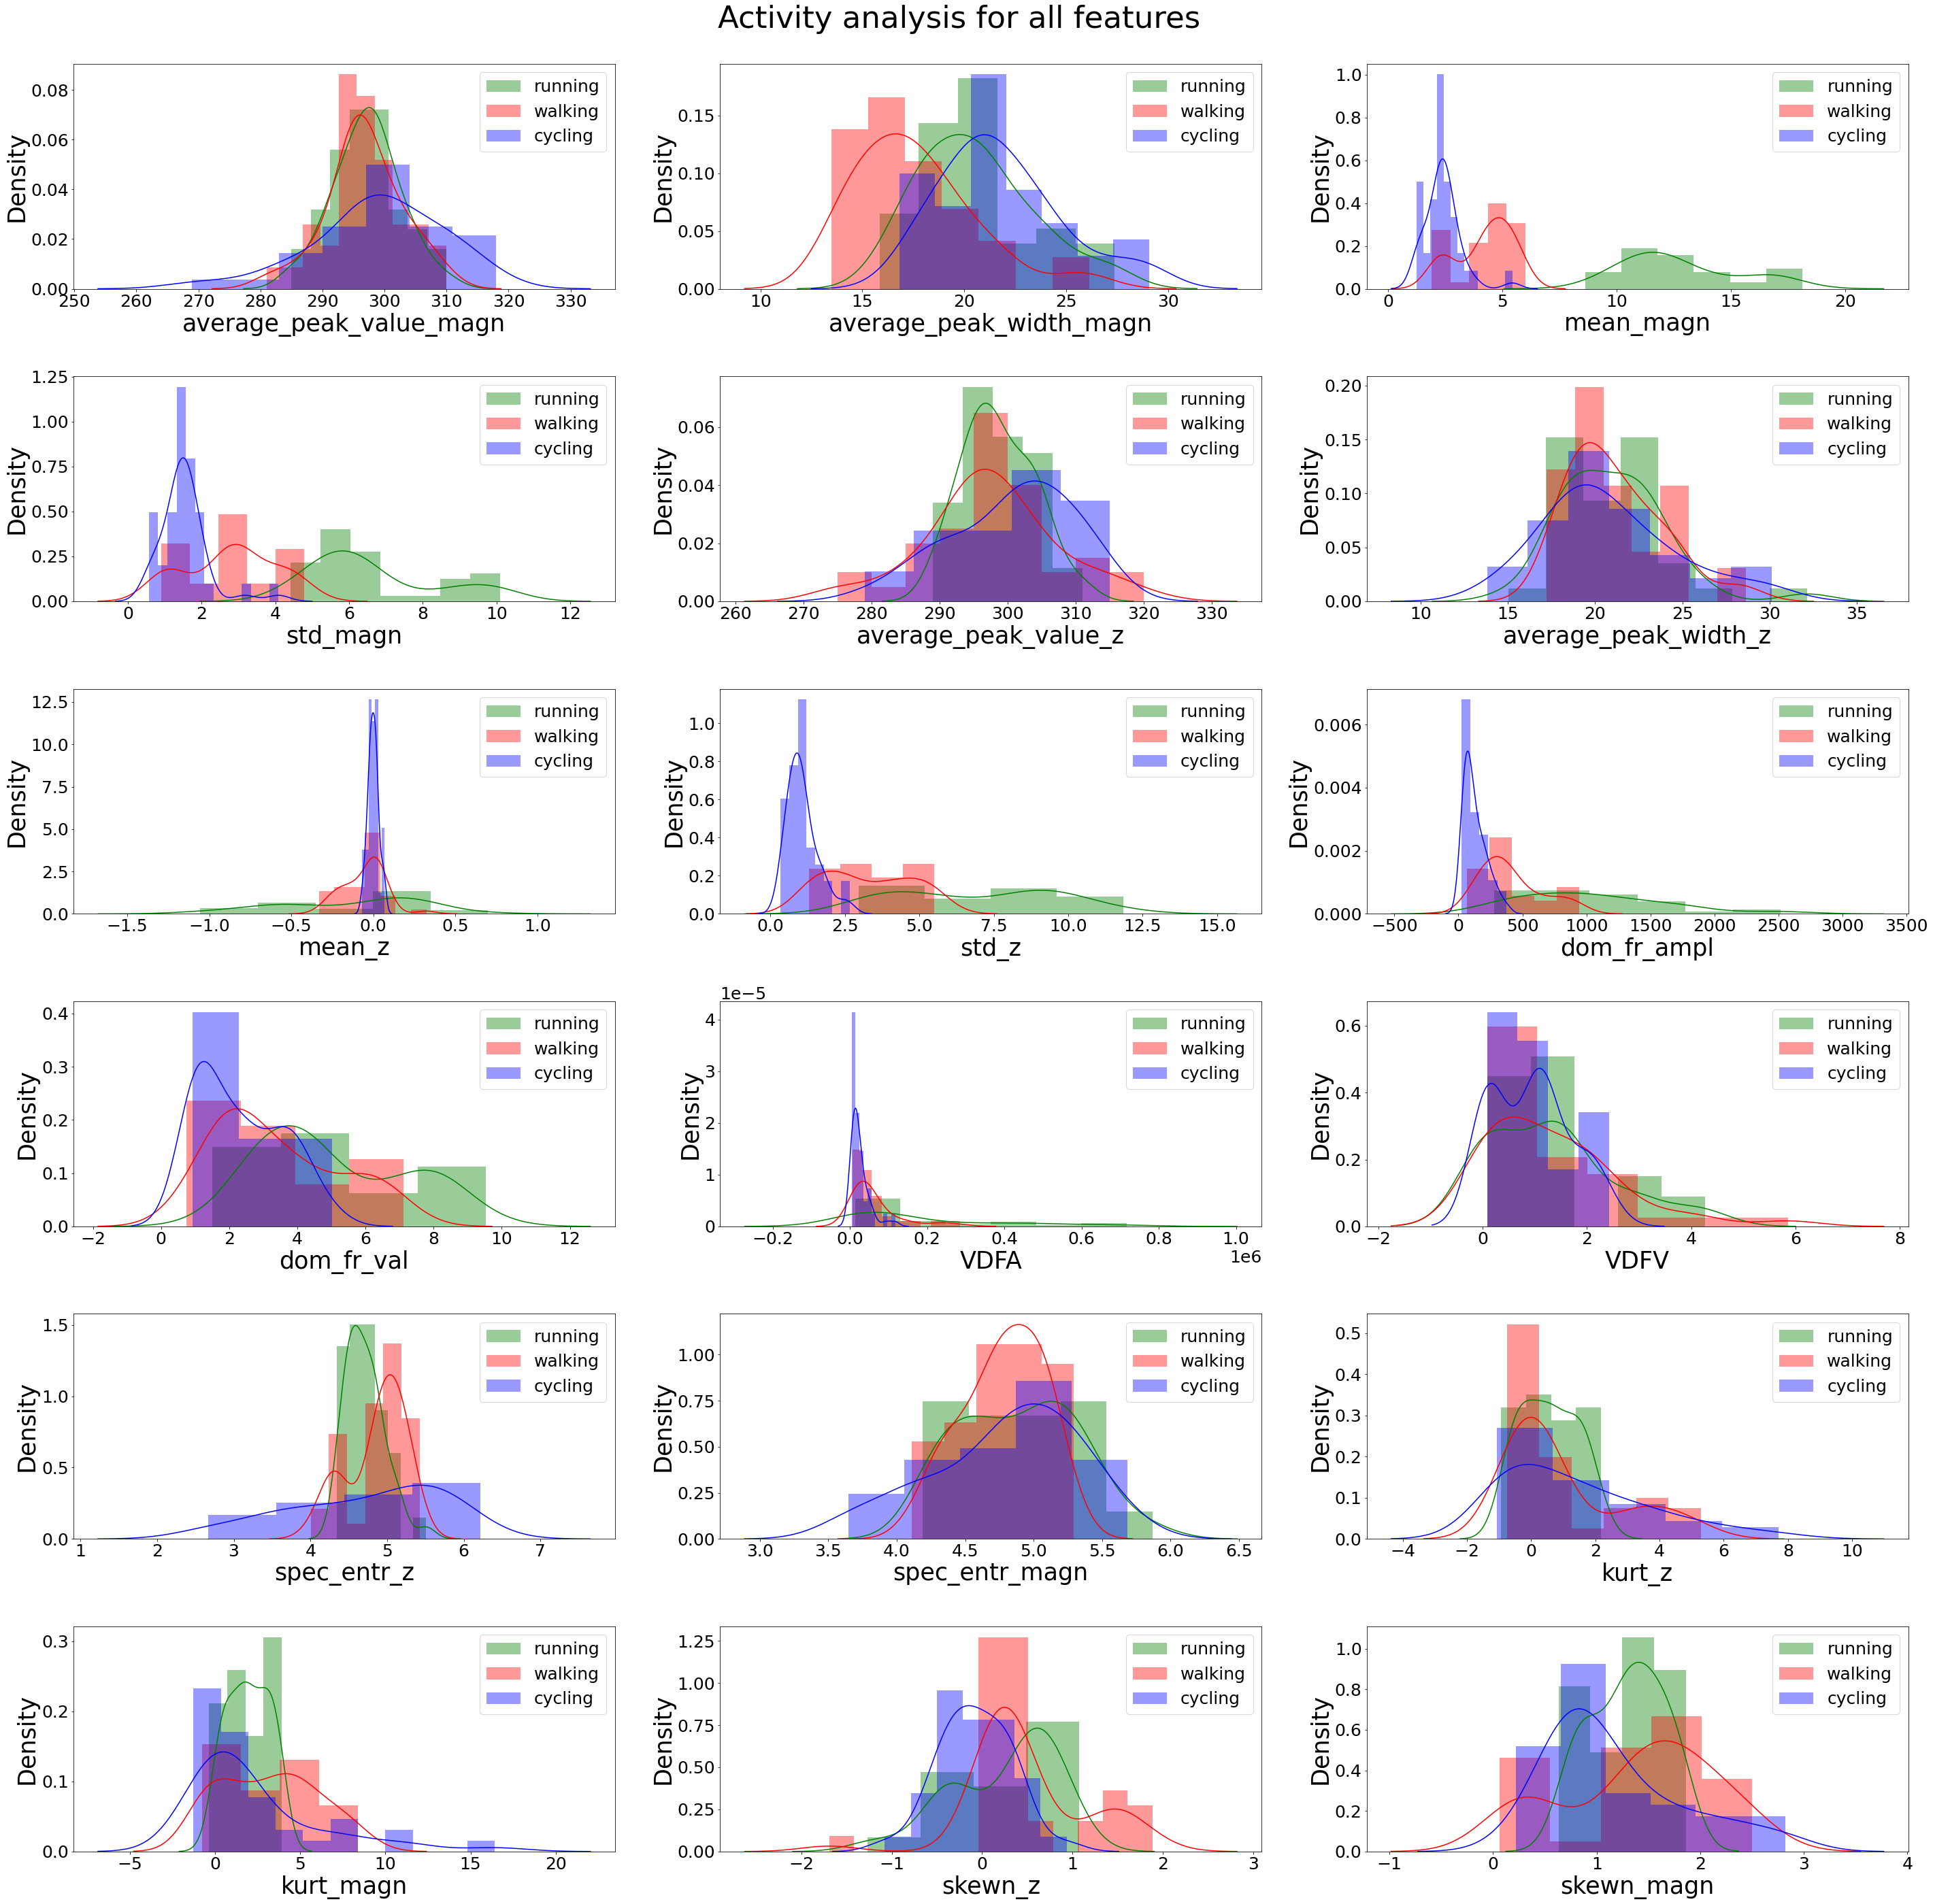

In [225]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") #There were warning messages because of the use of seaborn.distplot

#Function for the exclusion of inappropriate features
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0]) #Define the number of variables-features
    for i in range(0, numVars): #Loop for all variables
        regressor_OLS = sm.OLS(Y, x).fit() #Fit the data using OLS Regression
        maxVar = max(regressor_OLS.pvalues).astype(float) #Get the max p-value from the statistical test which is performed 
                                                            #based on Regression
            
        if maxVar > sl: #Check if max p-value is greater than 0.05
            for j in range(0, numVars - i): 
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j) #Exclude the feature which has equal p-value to maxVar
                    
    regressor_OLS.summary()
    return x, columns #Return the remaing features

SL = 0.05 #Significant Level

#Get the most significant features based on OLS Regression
data_modeled, selected_columns = backwardElimination(df.iloc[:,0:].values, labels_as_numeric_values[:,0], SL, feature_names[:,0])


#Convert 'df' Data frame of 'features' values in this way to use it at seaborn.distplot
data = pd.DataFrame(data = df.iloc[:,0:].values, columns = feature_names[:,0])

#Convert numeric target labels array to Data Frame to use it at seaborn.distplot
lab_numeric_data_frame = pd.DataFrame(labels_as_numeric_values[:,0], columns = ['Activity'])

#Create the distribution plots of all features
#Change the font size to fit better
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)    
plt.rc('ytick', labelsize=25)    
plt.rc('legend', fontsize=25)   
plt.rc('figure', titlesize=25)
sns.set_context(rc={"font.size":35,"axes.titlesize":35,"axes.labelsize":35})
fig = plt.figure(figsize = (40,40)) #Fix the figure size
j = 0
for i in data.columns: #For all features create a plot
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(data[i][lab_numeric_data_frame['Activity']==1], color='g', label = 'running') #Distribution of running
    sns.distplot(data[i][lab_numeric_data_frame['Activity']==2], color='r', label = 'walking') #Distribution of walking
    sns.distplot(data[i][lab_numeric_data_frame['Activity']==3], color='b', label = 'cycling') #Distribution of cycling
    plt.legend(loc='best')
fig.suptitle('Activity analysis for all features', fontsize=45)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



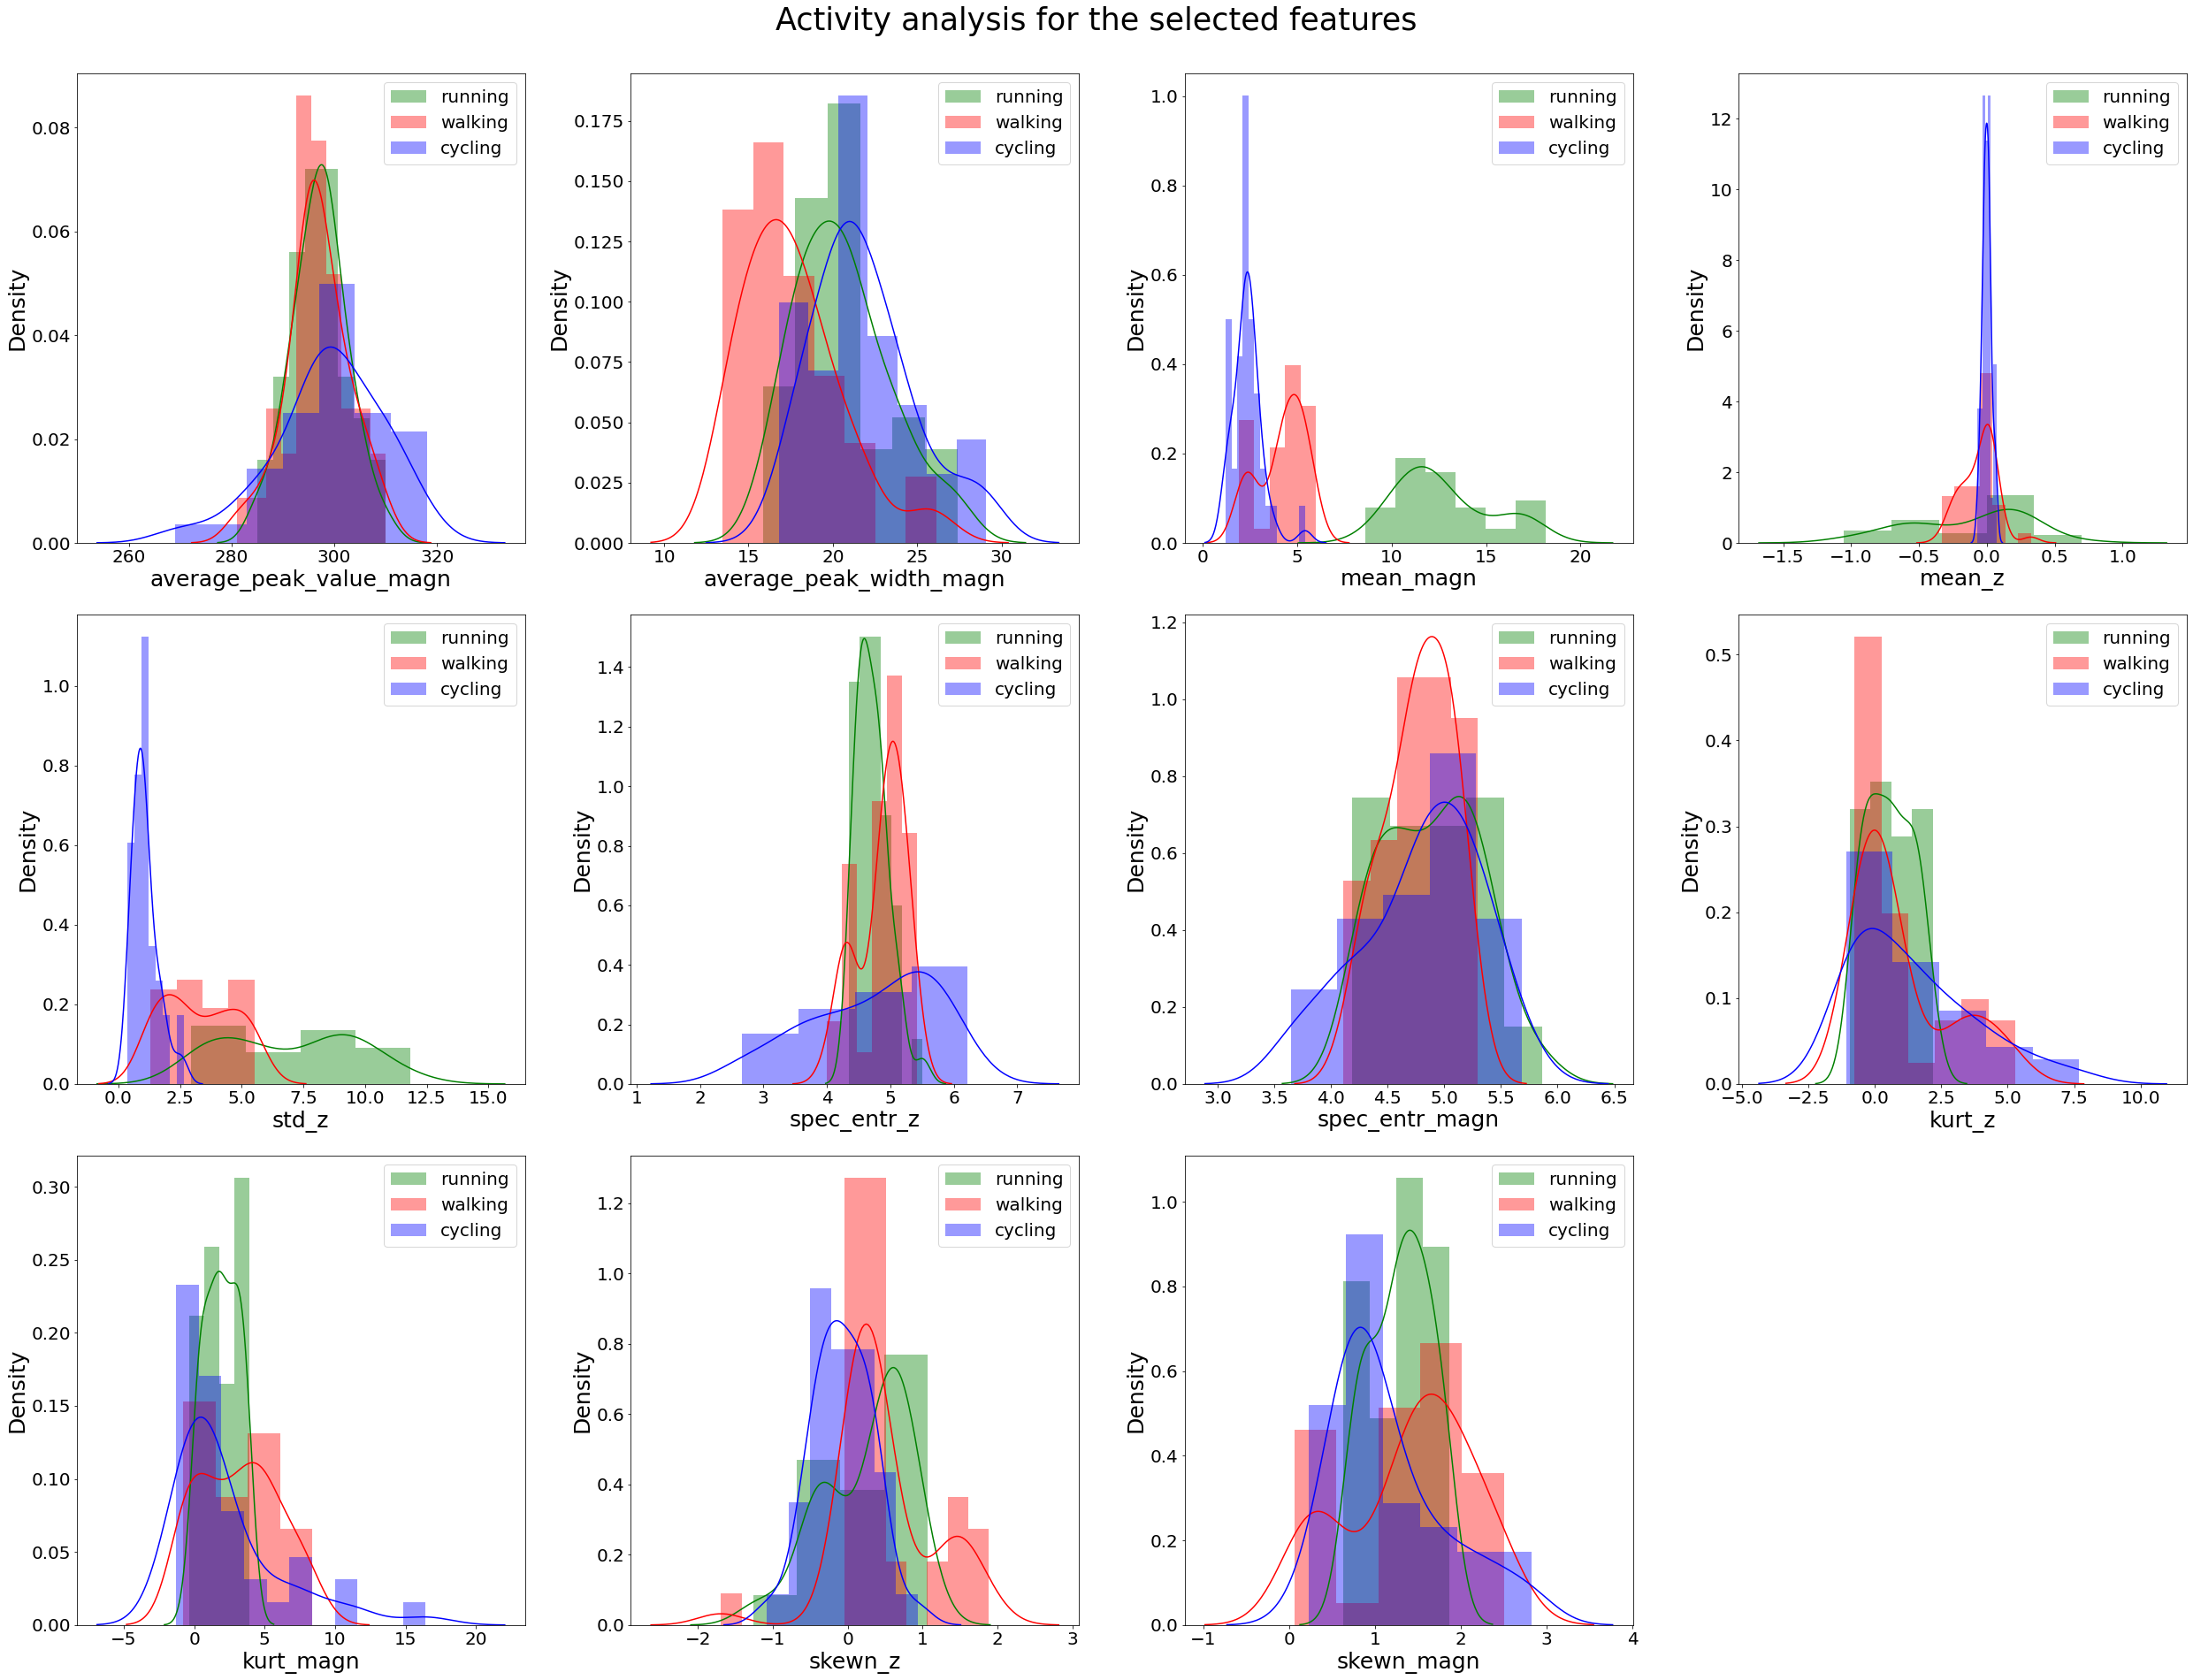

In [226]:
#Convert the array with the selected features to Data frame to use it at seaborn.distplot 
data_sel_feat = pd.DataFrame(data = data_modeled, columns = selected_columns)

#Create the distribution plots of the selected features only
fig_sel_feat = plt.figure(figsize = (35, 35))
j = 0
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.rc('figure', titlesize=20)
sns.set_context(rc={"font.size":25,"axes.titlesize":25,"axes.labelsize":25})
for i in data_sel_feat.columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sns.distplot(data_sel_feat[i][lab_numeric_data_frame['Activity']==1], color='g', label = 'running')
    sns.distplot(data_sel_feat[i][lab_numeric_data_frame['Activity']==2], color='r', label = 'walking')
    sns.distplot(data_sel_feat[i][lab_numeric_data_frame['Activity']==3], color='b', label = 'cycling')
    plt.legend(loc='best')
fig_sel_feat.suptitle('Activity analysis for the selected features', fontsize=35)
fig_sel_feat.tight_layout()
fig_sel_feat.subplots_adjust(top=0.95)
plt.show()

The above statistical test make the hypothesis that the coefficient is equal to zero for the combination of selected variables. Or in other words, the hypothesis is that the selected combination of dependent variables do not have any effect on the independent variable. The coefficient derived from the fitted Regression model where dependent variables are a combination of features for each test and independent variable is the predicted variable "activity". Instead of "running", "walking", "cycling" the independent variable of the model has values 1, 2, 3, respectively.

Based on the above diagrams, the best features are "average_peak_values_magn", "average_peak_width_magn", "mean_magn", "mean_z", "std_z", "spec_entr_z", "spec_entr_magn", "kurt_z", "kurt_magn", "skewn_z" and "skew_magn". However, we know that "mean_magn" and "std_z" are highly correlated to each other, thus we have to exclude one of them. The same should be done for the combination of "kurt_magn"-"skew_magn".


In order to choose, we can use SelectKBest method of sklearn. Specifically, we will use f_classif score function which uses ANOVA F-values to evaluate the features for their ability to predict the value of independent variable.

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Create array X. This array will be used to mix the train-validation samples and fit the models 
X = df.iloc[:,0:].values   #Also, this array will indicate the train-validation dataset with all features

#Create array y. This array will be the target values of train-validation samples.
y = labels[:,0]

#Use 'SelectKBest' method to evaluate the features
best_features = SelectKBest(score_func=f_classif, k="all")
fit = best_features.fit(X,y)

#Create a Data Frame with the scores of features
df_scores = pd.DataFrame(fit.scores_)

#Create a Data Frame with the names of features
df_columns = pd.DataFrame(feature_names[:,0]) #Use array "feature_name" to get the name of each evaluated feature

#Concatenate the two above Data Frames to get in one column the names of features and in other their scores
feature_scores = pd.concat([df_columns, df_scores],axis=1)

#Specify column names
feature_scores.columns = ['Feature_Name','Score'] 
print(feature_scores.nlargest(16,'Score'))

               Feature_Name       Score
2                 mean_magn  446.725187
3                  std_magn  179.601351
7                     std_z  112.165381
8               dom_fr_ampl   70.188456
9                dom_fr_val   24.900838
1   average_peak_width_magn   22.306325
10                     VDFA   17.493667
16                  skewn_z   10.604691
6                    mean_z    2.647377
14                   kurt_z    2.422728
15                kurt_magn    1.835124
11                     VDFV    1.784572
4      average_peak_value_z    1.590847
17               skewn_magn    1.431152
0   average_peak_value_magn    0.917507
13           spec_entr_magn    0.806367


As we can observe "mean_magn" has the better score. This is clearly, also, from the above plots where the distribution area of cycling is distinct and the distributions of walking and cycling are overlapped in a low degree. Consequently, "std_magn" has to be excluded even if it has a high score. 

The next feature in order is "std_z". The plots above shows that the distributions of "running" and "cycling" are distrinct in a moderate degree but the distribution of "walking" is highly overlapped. But we cannot use this feature because as it was mentioned previously, it is highly correlated with "mean magn".

In the same way, we will exclude "skew_magn" because it is extremely strong correlated with "kurt_magn" and "kurt_magn" has a higher score.

# Model phase

The next step is to buld a model. We can compare the performance of the model with all features and with selected features. Thus, a new dataset is created below without features "std_magn", "std_z" and "skew_magn".

In [17]:
print(feature_names[:,0]) #Print features now and after the exclusion

['average_peak_value_magn' 'average_peak_width_magn' 'mean_magn'
 'std_magn' 'average_peak_value_z' 'average_peak_width_z' 'mean_z' 'std_z'
 'dom_fr_ampl' 'dom_fr_val' 'VDFA' 'VDFV' 'spec_entr_z' 'spec_entr_magn'
 'kurt_z' 'kurt_magn' 'skewn_z' 'skewn_magn']


In [18]:
#Exclude std_magn from train-validation set
X_selected_feat = np.delete(X,3,1) #'X_selected_feat' array will indicate train-validation dataset with the selected features
selected_feat_names = np.delete(feature_names,3,0)                                                             

#Exclude std_z from train-validation set
X_selected_feat = np.delete(X_selected_feat,7-1,1)
selected_feat_names = np.delete(selected_feat_names,7-1,0)

#Exclude skewn_magn from train-validation set
X_selected_feat = np.delete(X_selected_feat,17-2,1)
selected_feat_names = np.delete(selected_feat_names,17-2,0)
print(selected_feat_names[:,0]) #Check if the right features were excluded

['average_peak_value_magn' 'average_peak_width_magn' 'mean_magn'
 'average_peak_value_z' 'average_peak_width_z' 'mean_z' 'dom_fr_ampl'
 'dom_fr_val' 'VDFA' 'VDFV' 'spec_entr_z' 'spec_entr_magn' 'kurt_z'
 'kurt_magn' 'skewn_z']


Also, exclude these features from the test set:

In [19]:
#Exclude std_magn from test set
X_test_selected_feat = np.delete(test_set_feat,3,1) #'X_test_selected_feat' array will indicate test dataset with the selected
                                                                                                                     #features

#Exclude std_z from test set
X_test_selected_feat = np.delete(X_test_selected_feat,7-1,1)


#Exclude skewn_magn from test set
X_test_selected_feat = np.delete(X_test_selected_feat,17-2,1)

A pipeline and a Standard Scaler are used to scale the dataset during cross validation, when the behaviour of *SVM classifier* is examined for different values of parameter *gamma*. 
This parameter determines the geometric margin of plane (or line for two dimensions) from which the support vectors are separated. Specifically, it defines how far influences the calculation of plausible plane of separation.

Also, the validation_curve() function is used to applied Cross Validation and create the plots which are shown the average performance of training and the average performance of validation. As performance it is used the accuracy which here is the average accuracy of subsets because we have multiclasses.

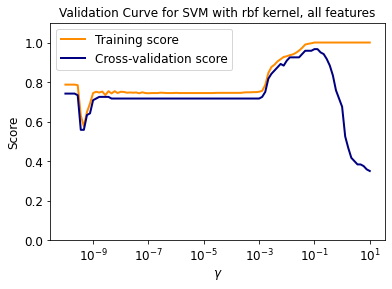

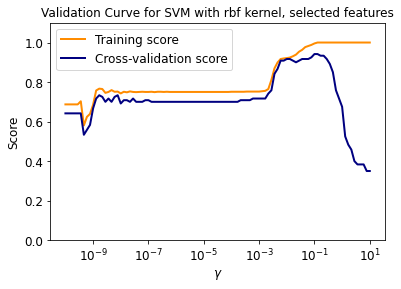

In [230]:
from sklearn.model_selection import validation_curve
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Create pipeline with SVM as classifier with rbf kernel and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(kernel='rbf')) ])

#Mix the train-validation sets for both all and selected features
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X_selected_feat, X, y = X_selected_feat[indices], X[indices], y[indices] #Mixed datasets are created

#Create the range of parameter gamma which will be examined and construct the validation curve for
#the dataset with all features
param_range_gamma = np.logspace(-10, 1, 100)
train_scores_all_feat, valid_scores_all_feat = validation_curve( #Return train and validation scores
    pipe, X, y, param_name="SVM__gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=4, cv = 10) #Use K=10 for Cross Validation and 4 parallel jobs

#Calculate the means of training scores for dataset with all features for the different gamma values
train_scores_mean_all_feat = np.mean(train_scores_all_feat, axis=1)  
                                                             
#Calculate the means of validation scores for dataset with all features for the different gamma values
valid_scores_mean_all_feat = np.mean(valid_scores_all_feat, axis=1)
                                                                

#Create the validation curve plot for the dataset with all features 
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with rbf kernel, all features")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

#Curve of means of training scores for the different gamma values
plt.semilogx(param_range_gamma, train_scores_mean_all_feat, label="Training score",
             color="darkorange", lw=lw)

#Curve of means validation scores for the different gamma values
plt.semilogx(param_range_gamma, valid_scores_mean_all_feat, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()



#Construct the validation curve for the same range of parameter gamma as above and for the dataset 
#with the selected features
train_scores_sel_feat, valid_scores_sel_feat = validation_curve(
    pipe, X_selected_feat, y, param_name="SVM__gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with the selected features for the different gamma values
train_scores_sel_feat_mean = np.mean(train_scores_sel_feat, axis=1)                

#Calculate the means of validation scores for dataset with the selected features for the different gamma values
valid_scores_sel_feat_mean = np.mean(valid_scores_sel_feat, axis=1)                  


#Create the validation curve plot for the dataset with the selected features
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with rbf kernel, selected features")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

#Curve of means of training scores for the different gamma values
plt.semilogx(param_range_gamma, train_scores_sel_feat_mean, label="Training score",
             color="darkorange", lw=lw)

#Curve of means validation scores for the different gamma values
plt.semilogx(param_range_gamma, valid_scores_sel_feat_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

As we can observe the performance of SVM differs a little bit comparing datasets with and without excluded features. This difference is referred both to the validation and training performance. 
At plot with all features we can see that the two curves intersect in a lower point than the plot with the selected features. The point of intersection, after which the two curves lead to different directions, shows the point where the model begins to overfit.

Even though the difference is slight, is better to use the dataset with the selected features in order to reduce the necessary calculations. Of course, it has to be mentioned that SVM is not affected too much from the dimensionality of dataset because is generally characterized by the number of support vectors. 

The value for parameter gamma where the curves intersect is between 10^-3 and 10^-1. To determine the exact value we can use GridSearchCV method of sklearn. We can also find out which is the best *kernel* for this dataset and the best value of parameter *C*. C is the penalty parameter which represents misclassification bound or in other words the tradeoff between the extent of generalization and the training performance. When its value is high all the datapoints will be classified correctly, but there is a chance to overfit. When its value is low the generalization of model has greater extent.

In [233]:
from sklearn.model_selection import GridSearchCV

#Create pipeline with SVM as classifier and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC()) ])

#Determine the range of parameter 'gamma'
param_range_gamma = np.logspace(-10, 1, 100)

#Determine the range of parameter 'C'
param_range_C = np.arange(0.1, 10, 0.5)

#Create the grid of parameters which are under examination with their range
param_grid = {'SVM__C': param_range_C, 'SVM__gamma': param_range_gamma,'SVM__kernel': ['rbf', 'poly']}

#Find the best values of parameters with GridSearchCV for the dataset with selected features
grid = GridSearchCV(pipe,param_grid,refit=True,verbose=1, n_jobs=4)
grid.fit(X_selected_feat,y) #Apply the fits for all combinations of the parameters values
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 4492 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 12492 tasks      | elapsed:   25.1s


Pipeline(steps=[('sc', StandardScaler()), ('SVM', SVC(C=4.6, gamma=0.1))])
{'SVM__C': 4.6, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


[Parallel(n_jobs=4)]: Done 20000 out of 20000 | elapsed:   38.2s finished


The best values which were found are gamma= 0.1 and C=4.6. Also, between the kernels "rbf" and "polynomial", the first seems to have better score. 
However, we should test the performance of "polynomial" kerner with different values of the parameter "degree".

In [234]:
#Create pipeline with SVM as classifier with polynomial kernel and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(kernel='poly')) ])

#Determine the range of parameter 'gamma'
param_range_gamma = np.logspace(-10, 1, 100)

#Determine the range of parameter 'C'
param_range_C = np.arange(0.1, 10, 0.5)

#Determine the range of parameter 'degree'
param_degree = np.arange(2, 13, 1)

#Create the grid of parameters which are under examination with their range
param_grid = {'SVM__C': param_range_C, 'SVM__gamma': param_range_gamma,'SVM__degree': param_degree}

#Find the best values of parameters with GridSearchCV for the dataset with selected features
grid = GridSearchCV(pipe,param_grid,refit=True,verbose=1, n_jobs=4)
grid.fit(X_selected_feat,y) #Apply the fits for all combinations of the parameters values
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 22000 candidates, totalling 110000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 5112 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 13112 tasks      | elapsed:   24.0s
[Parallel(n_jobs=4)]: Done 24312 tasks      | elapsed:   43.0s
[Parallel(n_jobs=4)]: Done 38712 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 56312 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 77112 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 101112 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 110000 out of 110000 | elapsed:  3.6min finished


Pipeline(steps=[('sc', StandardScaler()),
                ('SVM', SVC(C=0.1, gamma=0.2782559402207126, kernel='poly'))])
{'SVM__C': 0.1, 'SVM__degree': 3, 'SVM__gamma': 0.2782559402207126}


For the "polynomial" kernel we can see that the best values for parameters are quite different. "C" best value is 0.1, for "gamma" is 0.2782559402207126 and for "degree" is 3.

Now, let examine this kernel for the two different datasets (with all features and with selected features), for the different values of gamma:

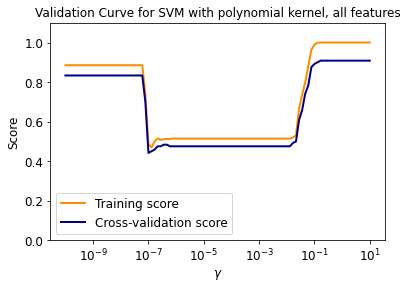

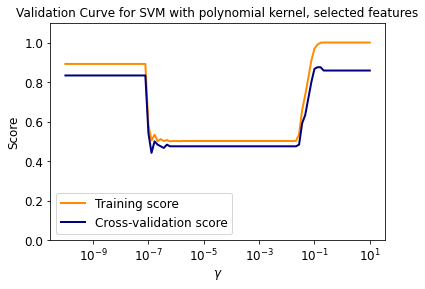

In [235]:
#Create pipeline with SVM as classifier with polynomial kernel and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(kernel='poly')) ])

#Determine the range of parameter 'gamma'
param_range_gamma = np.logspace(-10, 1, 100)

#Calculate training and validation scores of Cross Validation for dataset with all features 
train_scores_all_feat, valid_scores_all_feat = validation_curve(
    pipe, X, y, param_name="SVM__gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with all features for the different gamma values
train_scores_mean_all_feat = np.mean(train_scores_all_feat, axis=1)

#Calculate the means of validation scores for dataset with all features for the different gamma values
valid_scores_mean_all_feat = np.mean(valid_scores_all_feat, axis=1)

#Create the validation curve plot for the dataset with all features 
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with polynomial kernel, all features")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range_gamma, train_scores_mean_all_feat, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range, valid_scores_mean_all_feat, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


#Calculate training and validation scores of Cross Validation for dataset with the selected features
train_scores_sel_feat, valid_scores_sel_feat = validation_curve(
    pipe, X_selected_feat, y, param_name="SVM__gamma", param_range=param_range_gamma,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with the selected features for the different gamma values
train_scores_sel_feat_mean = np.mean(train_scores_sel_feat, axis=1)                

#Calculate the means of validation scores for dataset with the selected features for the different gamma values
valid_scores_sel_feat_mean = np.mean(valid_scores_sel_feat, axis=1)                

#Create the validation curve plot for the dataset with the selected features
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with polynomial kernel, selected features")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range_gamma, train_scores_sel_feat_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range_gamma, valid_scores_sel_feat_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

As we can see, SVM with polynomial kernel for the dataset with all features has almost the same performance with the dataset with the selected features. This means that planes which are produced from polynomial kernel are not affected too much from the correlation between the features.

Now we will examine the influence of two dataset for "linear" kernel in relation with "C" parameter:

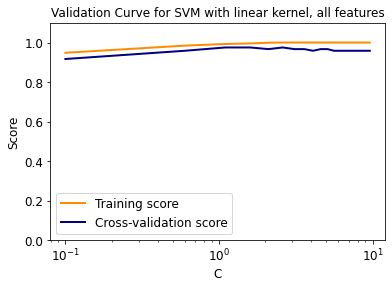

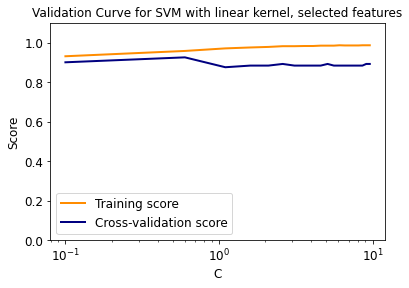

In [237]:
#Create pipeline with SVM as classifier with linear kernel and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(kernel='linear')) ])

#Determine the range of parameter 'C'
param_range_C = np.arange(0.1, 10, 0.5)

#Calculate training and validation scores of Cross Validation for dataset with all features 
train_scores_all_feat, valid_scores_all_feat = validation_curve(
    pipe, X, y, param_name="SVM__C", param_range=param_range_C,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with all features for the different C values
train_scores_mean_all_feat = np.mean(train_scores_all_feat, axis=1)

#Calculate the means of validation scores for dataset with all features for the different C values
valid_scores_mean_all_feat = np.mean(valid_scores_all_feat, axis=1)

#Create the validation curve plot for the dataset with all features 
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with linear kernel, all features")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range_C, train_scores_mean_all_feat, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range_C, valid_scores_mean_all_feat, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


#Calculate training and validation scores of Cross Validation for dataset with the selected features
train_scores_sel_feat, valid_scores_sel_feat = validation_curve(
    pipe, X_selected_feat, y, param_name="SVM__C", param_range=param_range_C,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with the selected features for the different C values
train_scores_sel_feat_mean = np.mean(train_scores_sel_feat, axis=1)

#Calculate the means of validation scores for dataset with the selected features for the different C values
valid_scores_sel_feat_mean = np.mean(valid_scores_sel_feat, axis=1)

#Create the validation curve plot for the dataset with the selected features
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.title("Validation Curve for SVM with linear kernel, selected features")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range_C, train_scores_sel_feat_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range_C, valid_scores_sel_feat_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

As it can be observed, both of datasets are produced curves that do not intersect. This means that the linear-based model is overfitted because this dataset is not linearly seperated. This happens even though kernel trick is used to produce a different space of dataset with the aim of dot product.

In this point, we should compare the performance of "rbf" kernel with the "polynomial" kernel each one with its best values of parameters. This is done in order to decide with which kernel the final test of SVM classifier will be done. 

Function cross_val_score() is used in order to get mean accuracy of subsets from Cross Validation.

In [239]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#Create pipeline with SVM as classifier with rbf kernel and its best parameters values, and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(kernel='rbf', C=4.6, gamma=0.1))])

#Get scores for SVM with rbf kernel
scores = cross_val_score(pipe, X_selected_feat, y, cv=10)
print("Mean accuracy for rbf kernel: "+ str(np.mean(scores)))

#Create pipeline with SVM as classifier with polynomial kernel and its best parameters values, and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('SVM', svm.SVC(C=0.1, gamma=0.2782559402207126, kernel='poly'))])

#Get scores for SVM with polynomial kernel
scores = cross_val_score(pipe, X_selected_feat, y, cv=10)
print("Mean accuracy for polynomial kernel: "+ str(np.mean(scores)))


Mean accuracy for rbf kernel: 0.9416666666666667
Mean accuracy for polynomial kernel: 0.875


SVM with rbf kernel seems to have better performance than polynomial kernel.
After these results, we can use "rbf" kernel to perfom the test of model with the test which has not been used so far. We will scale the test set seperately in order not to be biased.
Also, the confusion matrix will be created to interpret the results.

              precision    recall  f1-score   support

     Running      0.650     0.650     0.650        20
     Walking      0.900     0.900     0.900        20
     Cycling      0.600     0.600     0.600        20

    accuracy                          0.717        60
   macro avg      0.717     0.717     0.717        60
weighted avg      0.717     0.717     0.717        60



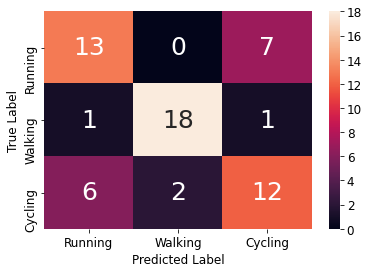

In [275]:
from sklearn import metrics

#Create SVM classifier with rbf kernel and its best parameters values
SVM_rbf = svm.SVC(kernel='rbf', C=4.6, gamma=0.1)

#Use StandardScaler to compute mean and standard deviation of train-validation dataset with the selected features
scaler = StandardScaler().fit(X_selected_feat)
X_scaled_selected_feat = scaler.transform(X_selected_feat) #Trasform dataset using formula x=(x-mean)/standard_deviation
SVM_rbf.fit(X_scaled_selected_feat,  y) #Train SVM model with train-validation dataset with the selected features

#Use StandardScaler to compute mean and standard deviation of test dataset with the selected features
scaler_test = StandardScaler().fit(X_test_selected_feat)
X_scaled_test_selected_feat = scaler_test.transform(X_test_selected_feat) #Transform dataset
y_test_pred_SVM = SVM_rbf.predict(X_scaled_test_selected_feat) #Get predictions using test dataset with the selected features

#Trasform array of test dataset labels to an array of shape (60,) 
y_test_labels = test_set_labels[:,0]

#Compute confusion matrix values based on the predictions and the real labels
cm_SVM_test = confusion_matrix(y_test_labels, y_test_pred_SVM)

#Print classification report which includes all the computed metrics values
print(metrics.classification_report(y_test_labels, y_test_pred_SVM, digits=3, target_names = ["Running","Walking","Cycling"]))

#Plot confusion matrix as a heatmap
ax = sns.heatmap(cm_SVM_test, annot=True, xticklabels=["Running","Walking","Cycling"], yticklabels=["Running","Walking","Cycling"])
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

From these results, it is concluded that the most accurate prediction is for "walking". Only 2 to 20 were false predicted. These false predictions were misclassified 1 in "cycling" class and 1 in "running" class. This is why "walking" has a high f1-score.

On the other hand, the model has a high misclassification rate for the activities "running" and "cycling". As we can observe 7 to 20 running samples were misclassified in "cycling" class and none to "walking". 

In a similar way but with 1 more misclassification, cycling samples were found in the true class with percentage 12/20 = 0,6. 
2 of them were misclassified in "walking" class and 6 to "running".

An interesting fact is that all classes has symmetrical number of false negative and false positive classifications. This is the reason of each class having precision = recall = f1. An example of this, is for "running" where false_negative_number = 0+7=7 and false_positive_number = 1+6=7. 

The above results were not expected during the exploration phase as the "running" class was seem to be easily seperable from the mean of magnitude signal in contrast with "cycling" and "walking". This maybe happens because the training-validation set consists only by 66,6% of samples and test set is the rest 33,3% of samples. Thus, this might lead to a low generalization of the model.

One of the result that we have to keep in mind is the total 0,71 f1-score.

Afterwards, kNN classifier will be trained and tested. 
kNN is applied in dataset with all features and with selected features in relations with the different values of parameter "n_neighbors":

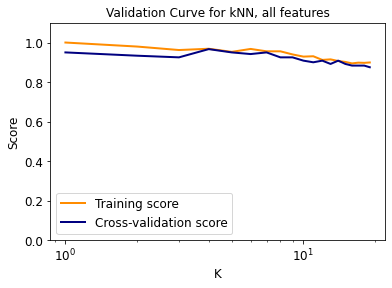

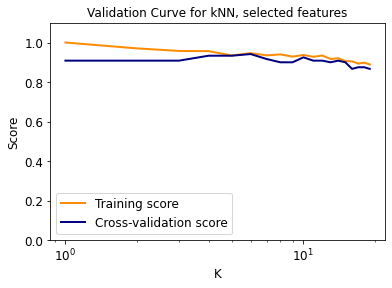

In [255]:
from sklearn.neighbors import KNeighborsClassifier

#Create pipeline with kNN as classifier and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('kNN', KNeighborsClassifier())])

#Determine the range of parameter 'n_neighbors' which is examined. Let call this parameter 'K' as it determines the K-nearest
param_range_K = np.arange(1, 20, 1)                                                                                #neighbors

#Calculate training and validation scores of Cross Validation for dataset with all features 
train_scores_all_feat, valid_scores_all_feat = validation_curve(
    pipe, X, y, param_name="kNN__n_neighbors", param_range=param_range_K,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with all features for the different K values
train_scores_mean_all_feat = np.mean(train_scores_all_feat, axis=1)

#Calculate the means of validation scores for dataset with all features for the different K values
valid_scores_mean_all_feat = np.mean(valid_scores_all_feat, axis=1)


#Create the validation curve plot for the dataset with all features 
plt.title("Validation Curve for kNN, all features")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.semilogx(param_range_K, train_scores_mean_all_feat, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range_K, valid_scores_mean_all_feat, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()



#Calculate training and validation scores of Cross Validation for dataset with the selected features
train_scores_sel_feat, valid_scores_sel_feat = validation_curve(
    pipe, X_selected_feat, y, param_name="kNN__n_neighbors", param_range=param_range_K,
    scoring="accuracy", n_jobs=4, cv = 10)

#Calculate the means of training scores for dataset with the selected features for the different K values
train_scores_sel_feat_mean = np.mean(train_scores_sel_feat, axis=1)

#Calculate the means of validation scores for dataset with the selected features for the different K values
valid_scores_sel_feat_mean = np.mean(valid_scores_sel_feat, axis=1)

#Create the validation curve plot for the dataset with the selected features
plt.title("Validation Curve for kNN, selected features")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=10)
plt.semilogx(param_range_K, train_scores_sel_feat_mean, label="Training score",
             color="darkorange", lw=lw)

plt.semilogx(param_range_K, valid_scores_sel_feat_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

As in SVM, the performance of kNN seems to have a sight variation for the different set of features. However, both of performances are very high. Because kNN is affected from the dimensionality increase, even though this increase is low in our case, it is better to use dataset with the selected features. 
The influence of kNN to dimensionality increase is happened because this classifier calculates the dinstance of every point with all the rest points in order to determine the K-nearest. These calculations are performed in all dimensions and so the less the dimensions the fewer the calculations. 

So, let define the best value for "K" parameter.

In [265]:
#Create pipeline with kNN as classifier and scale with StandardScaler
pipe = Pipeline([('sc', StandardScaler()),('kNN', KNeighborsClassifier()) ])

#Determine the range of parameter K
param_range_K = np.arange(1, 20, 1) 

#Create the grid which consists only of parameter K with its range
param_grid = {'kNN__n_neighbors': param_range_K}

#Find the best values of parameter K with GridSearchCV for the dataset with selected features
grid = GridSearchCV(pipe,param_grid,refit=True,verbose=1, n_jobs=4)
grid.fit(X_selected_feat,y) #Apply the fits for all values of K
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Pipeline(steps=[('sc', StandardScaler()),
                ('kNN', KNeighborsClassifier(n_neighbors=4))])
{'kNN__n_neighbors': 4}


[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:    0.2s finished


The best value for K parameter seems to be the number 4. Taking this into consideration we can fit the classifier with the train-validation set and make the predictions with the test set in order to evaluate its performance.

In essence, kNN does not apply a training, just fitting to the dataset. To perform a prediction for a specific unlabeled datapoint, kNN calculate the number of each class of K-nearest neighbors datapoints of train set for the specific datapoint.

              precision    recall  f1-score   support

     Running      0.750     0.600     0.667        20
     Walking      0.792     0.950     0.864        20
     Cycling      0.550     0.550     0.550        20

    accuracy                          0.700        60
   macro avg      0.697     0.700     0.693        60
weighted avg      0.697     0.700     0.693        60



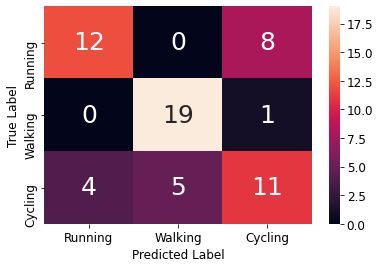

In [272]:
#Create kNN classifier with the best K value which was discovered
kNN_classif = KNeighborsClassifier(n_neighbors=4 )

#Fit kNN model to train-validation dataset with the selected features. 
kNN_classif.fit(X_scaled_selected_feat,  y) #Train-validation set is already scaled

#Get predictions using test dataset with the selected features
y_test_pred_kNN = kNN_classif.predict(X_scaled_test_selected_feat) #Test set is already scaled

#Compute confusion matrix values based on the predictions and the real labels
cm_kNN_test = confusion_matrix(y_test_labels, y_test_pred_kNN)

#Print classification report
print(metrics.classification_report(y_test_labels, y_test_pred_kNN, digits=3, target_names = ["Running","Walking","Cycling"]))

#Plot confusion matrix as a heatmap
ax = sns.heatmap(cm_kNN_test, annot=True, xticklabels=["Running","Walking","Cycling"], yticklabels=["Running","Walking","Cycling"])
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

As SVM, kNN can classify more effectively "walking" activity. Only 1 to 20 "walking" samples were misclassified which led to a 0.95 recall score. 
"Running" and "cycling" confuse the algorithm and thus 8 in 20 total "running" samples were misclassfied in "cycling" class and zero to "walking".
Conserning "cycling" samples, kNN has the worst performance in comparison with the other two because only 11 to 20 were correct classified. The rest of 9 samples were misclassified with the 8 of these to be in the "running" class. Again, here we can see that the algorithm is confound for the two classes. These results lead the recall for this class to be almost as in a random classification which means that kNN cannot make predictions for "cycling" samples much greater than randomly.
A significant conclusion that should be made is that both "running" and "walking" overlaps "cycling" class in a great extent. This happens because their ("running" and "walking") number of false positive are contained in class "cycling" and are almost equal.  
All the above lead the total f1-score score of kNN to be 0,7. This score is great closed with the corresponding result of SVM. However, in order to rank the two algorithm when we have equal number of samples for each class we should make the plots of ROC curves for both of them and make safe conclusions.
Because we deal with a multiclass problem, labels both for train-validation and test sets have to be binarized in order to make ROC curve for each class. 
Also, we use "oneVsRestClassifier" method to get the results just as performing classification for each class against all the other classes. Next, for SVM we use "decision_function" to get the scores of these classifications, but for kNN we use "predict_proba". This happens because in SVM we can get the results of how far of each resulted hyperplane the datapoints are in contrast with kNN where we can get the calculated number of each class of k-Nearest Neighbors. 

In [28]:
import plotly.graph_objects as go
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



#Determine the colors which will be used at ROC curve plots
colors = ['royalblue', 'orange', 'turquoise', 'lightyellow']

#Define the classes for ROC curves
classes = ["running", "walking", "cycling"]
n_class = len(classes)



#Binarize labels of train-validation set
y_bin = label_binarize(y, classes=["running","walking","cycling"])

#Binarize labels of test set
y_test_bin = label_binarize(y_test_labels, classes=["running","walking","cycling"])

#fit SVM model with oneVsRestClassifier
SVM_roc = OneVsRestClassifier(svm.SVC(kernel='rbf', C=4.6, gamma=0.1, probability=True)) 

#Get the scores using decision_function
score_SVM = SVM_roc.fit(X_scaled_selected_feat, y_bin).decision_function(X_scaled_test_selected_feat)

#Compute false positive and true positive rates and construct multi-class ROC curves for SVM
fpr_SVM = {}
tpr_SVM = {}
thresh_SVM ={}
roc_auc_SVM = dict()
class_list_SVM = dict()
data_to_plot_svm = []
for i, clas in enumerate(classes): #For each class compute false positive and true potive rate
    fpr_SVM[i], tpr_SVM[i], _ = roc_curve(y_test_bin[:,i], score_SVM[:,i])
    class_list_SVM[i] = clas
    roc_auc_SVM[i] = auc(fpr_SVM[i], tpr_SVM[i])
    
    #ROC curves for SVM
    data_to_plot_svm.append(go.Scatter(x=fpr_SVM[i], y=tpr_SVM[i], line=dict(color=colors[i], width=2, dash='dash'), 
                                   name=f'{clas} - ROC - AUC={roc_auc_SVM[i]:.2f}'))

#ROC curve of random classification as a threshold
data_to_plot_svm.append(go.Scatter(x=[0, 1], y=[0, 1], line=dict(color='gray', width=1, dash='dash'), name='baseline'))

#Determine the titles of plot
fig = go.Figure(data=data_to_plot_svm,layout=go.Layout(title={'text': 'Multiclass ROC curve for SVM', 'y':0.9, 'x':0.4,
                                                          'xanchor': 'center'},
                                                   xaxis=dict(title="false positive rate",),  
                                                   yaxis=dict(title="true positive rate",)))
#Plot ROC curves for SVM
plotly.offline.iplot(fig)  



#fit kNN model with oneVsRestClassifier    
kNN_roc = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4 ))

#Get the scores using predict_proba
score_kNN = kNN_roc.fit(X_scaled_selected_feat, y_bin).predict_proba(X_scaled_test_selected_feat)

##Compute false positive and true positive rates and construct multi-class ROC curves for kNN
fpr_kNN = {}
tpr_kNN = {}
thresh_kNN ={}
roc_auc_kNN = dict()
class_list_kNN = dict()
data_to_plot_kNN = []
for i, clas in enumerate(classes): #For each class compute false positive and true potive rate   
    fpr_kNN[i], tpr_kNN[i], _ = roc_curve(y_test_bin[:,i], score_kNN[:,i])
    class_list_kNN[i] = clas
    roc_auc_kNN[i] = auc(fpr_kNN[i], tpr_kNN[i])
    
    #ROC curves for kNN
    data_to_plot_kNN.append(go.Scatter(x=fpr_kNN[i], y=tpr_kNN[i], line=dict(color=colors[i], width=2, dash='dash'), 
                                   name=f'{clas} - ROC - AUC={roc_auc_kNN[i]:.2f}'))

#ROC curve of random classification as a threshold    
data_to_plot_kNN.append(go.Scatter(x=[0, 1], y=[0, 1], line=dict(color='gray', width=1, dash='dash'), name='baseline'))    

#Determine the titles of plot
fig = go.Figure(data=data_to_plot_kNN,layout=go.Layout(title={'text': 'Multiclass ROC curve for kNN', 'y':0.9, 'x':0.4,
                                                          'xanchor': 'center'},
                                                   xaxis=dict(title="false positive rate",),  
                                                   yaxis=dict(title="true positive rate",))) 
#Plot ROC curves for kNN
plotly.offline.iplot(fig)

# Communicate phase

ROC curves take into consideration True Positive Rate (TP/(TP + FN)) and False Positive Rate (FP/(TN + FP)) of a specific class
Specifically, in this case we have multiclasses and the produced ROC curves is refered to each class versus the rest classes. So in the above plots, we can see the relation of true positive rate with the false positive rate of each class and the results are slightly different from the above analysis of confusion matrices. As we have seen at the confusion matrices of SVM and kNN, "running" samples misclassification was not the least of all. However, as we can see from ROC curves when we examined how many of the samples which were classified as "running" are correct in comparison with only one other class ("cycling" and "walking" as one class), we take the best score. 
It is clear that these are different measures (number of misclassification, true positive-false positive rate). Therefore, based on the ROC curves we can conclude that SVM can achieve more accurate predictions for all activities compared with kNN. 

Analysing SVM ROC curves, for "running" there is a 98% chance that the model will be able to distinguish between the correct and false class. In other words, when it predicts that 100 samples belong to "running" class, then only the 2 of these will not belong to this class. The corresponding number per 100 samples for "walking" is 12 and for "cycling" 8. This rank totally agrees with the distribution of features per activity, where we could distinguish the activities in this way. The easiest was "running", then "cycling" and finally "walking". 

kNN classifier has a similar behaviour regarding the rank of predictions accuracy per class. But its scores are slightly lower than those of SVM. Specifically, kNN can predict if a sample belongs in "running" class against the others two classes as one, with a 95% percent given that this sample is indeed a "running" sample. As we can observe from the above plots, the corresponding percent for "walking" class is 72% and for "cycling" is 88%.

Concluding, a smartphone user who would like to monitor his/her activities by putting the smartphone in trouser pocket, could use both of the models (but preferably SVM) to make accurate enough predictions, especially for "running" and "cycling" activities. The accuracy of predictions for "walking" might be greater if the samples from smarthphone accelerometer have a longer duration. Or a time-window based model could be used individually or in combination with the present model. Thus, there is some future work that could be done to increase the predictions of each class and especially for "walking". 